In [ ]:
# ライブラリのインストール（初回のみ必要）
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.mixture import GaussianMixture

# データ準備
# Nikkei225のログリターンを使用（仮データ）
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)

# Step 1: Gaussian Mixture Modelでレジームを推定
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(returns.reshape(-1, 1))

# Step 2: 各レジームに対してGARCHモデルを適用
regime1_returns = returns[labels == 0]
regime2_returns = returns[labels == 1]

# レジーム1: GARCH(1,1)
garch1 = arch_model(regime1_returns, vol='Garch', p=1, q=1)
garch1_fit = garch1.fit(disp="off")

# レジーム2: GARCH(1,1)
garch2 = arch_model(regime2_returns, vol='Garch', p=1, q=1)
garch2_fit = garch2.fit(disp="off")

# 結果を表示
print("Regime 1 GARCH Parameters:")
print(garch1_fit.summary())
print("\nRegime 2 GARCH Parameters:")
print(garch2_fit.summary())


Regime 1 GARCH Parameters:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -470.623
Distribution:                  Normal   AIC:                           949.247
Method:            Maximum Likelihood   BIC:                           966.137
                                        No. Observations:                  504
Date:                Sun, Jan 12 2025   Df Residuals:                      503
Time:                        00:55:58   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.7910  2.681e-02     29.502

In [ ]:
import numpy as np

# データの準備
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # 仮の収益率データ

# モデルの初期設定
n_iter = 1000  # ギブスサンプルの反復回数
n_regimes = 2  # レジーム数
n_data = len(returns)

# 初期値
regime_states = np.random.choice(n_regimes, size=n_data)  # ランダムにレジームを割り当て
omega = np.random.rand(n_regimes)  # 各レジームの初期値
alpha = np.random.rand(n_regimes)
beta = np.random.rand(n_regimes)
h = np.ones(n_data)  # 初期ボラティリティ

# ギブスサンプリングの実行
for iteration in range(n_iter):
    # ステップ1: レジームのサンプリング
    for t in range(n_data):
        prob = np.zeros(n_regimes)
        for s in range(n_regimes):
            prob[s] = np.exp(-0.5 * ((returns[t] ** 2) / h[t]))  # 簡略化した条件付き分布
        prob /= prob.sum()
        regime_states[t] = np.random.choice(n_regimes, p=prob)

    # ステップ2: GARCHパラメータのサンプリング
    for s in range(n_regimes):
        regime_data = returns[regime_states == s]
        omega[s] = np.random.gamma(2, 0.1)  # 仮の条件付き分布
        alpha[s] = np.random.gamma(2, 0.1)
        beta[s] = np.random.gamma(2, 0.1)

    # ステップ3: 条件付き分散のサンプリング
    for t in range(1, n_data):
        h[t] = omega[regime_states[t]] + alpha[regime_states[t]] * (returns[t-1] ** 2) + beta[regime_states[t]] * h[t-1]

# 結果の表示
print("最終的なレジーム割り当て:", regime_states[:10])
print("最終的なGARCHパラメータ:")
print("Omega:", omega)
print("Alpha:", alpha)
print("Beta:", beta)


最終的なレジーム割り当て: [0 0 1 1 0 0 1 1 1 0]
最終的なGARCHパラメータ:
Omega: [0.33677195 0.0231721 ]
Alpha: [0.29810092 0.26593244]
Beta: [0.03221193 0.28194139]


In [ ]:
from arch import arch_model

# Step 2: 各レジームに対して GARCH(1,1) モデルを適用
data =read.data.csv
# レジーム 0 のデータ
regime_0_returns = data[data['Regime'] == 0]['Log_Return']
garch_0 = arch_model(regime_0_returns, vol='Garch', p=1, q=1)
garch_0_fit = garch_0.fit(disp="off")

# レジーム 1 のデータ
regime_1_returns = data[data['Regime'] == 1]['Log_Return']
garch_1 = arch_model(regime_1_returns, vol='Garch', p=1, q=1)
garch_1_fit = garch_1.fit(disp="off")

# 結果の要約を表示
garch_0_summary = garch_0_fit.summary()
garch_1_summary = garch_1_fit.summary()

garch_0_summary, garch_1_summary


NameError: name 'read' is not defined

In [ ]:
import pandas as pd
from arch import arch_model

# Step 2: 各レジームに対して GARCH(1,1) モデルを適用
# 'data.csv' ファイルを読み込む
data = pd.read_csv('data.csv')  # pd.read_csv() を使用してCSVファイルを読み込む
# レジーム 0 のデータ
regime_0_returns = data[data['Regime'] == 0]['Log_Return']
garch_0 = arch_model(regime_0_returns, vol='Garch', p=1, q=1)
garch_0_fit = garch_0.fit(disp="off")

# レジーム 1 のデータ
regime_1_returns = data[data['Regime'] == 1]['Log_Return']
garch_1 = arch_model(regime_1_returns, vol='Garch', p=1, q=1)
garch_1_fit = garch_1.fit(disp="off")

# 結果の要約を表示
garch_0_summary = garch_0_fit.summary()
garch_1_summary = garch_1_fit.summary()

garch_0_summary, garch_1_summary

KeyError: 'Regime'

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive をマウント
drive.mount('/content/drive')

# ファイルパスを指定して読み込み
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')

# データの確認
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/研究/データ/統合データ.csv'

In [ ]:
from google.colab import drive
import pandas as pd
import os

# Google Drive をマウント
drive.mount('/content/drive')

# ファイルパスを指定して読み込み
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'

# ファイルが存在することを確認
if not os.path.exists(file_path):
  raise FileNotFoundError(f"File not found: {file_path}. Please check the file path and ensure it exists in your Google Drive.")

data = pd.read_csv(file_path, encoding='shift_jis')

# データの確認
print(data.head())

Mounted at /content/drive
       Date  収益率(Nikkei225)  Log_Return  DI_leading    CI  CI_leading
0  1985/1/1          0.0390    0.038259        54.5  91.8        85.2
1  1985/2/1          0.0274    0.027031        45.5  91.4        85.5
2  1985/3/1          0.0217    0.021468        40.9  91.3        85.4
3  1985/4/1         -0.0130   -0.013085        63.6  92.3        86.0
4  1985/5/1          0.0293    0.028879        54.5  92.3        86.0


In [ ]:
import numpy as np

# Log_Return 列を取得
returns = data['Log_Return'].dropna().values  # 欠損値を除去

# ギブスサンプリングのパラメータ
n_iter = 1000  # ギブスサンプルの反復回数
n_regimes = 2  # レジーム数
n_data = len(returns)

# 初期値
regime_states = np.random.choice(n_regimes, size=n_data)  # ランダムにレジームを割り当て
omega = np.random.rand(n_regimes)  # 各レジームの初期値
alpha = np.random.rand(n_regimes)
beta = np.random.rand(n_regimes)
h = np.ones(n_data)  # 初期ボラティリティ

# ギブスサンプリングの実行
for iteration in range(n_iter):
    # ステップ1: レジームのサンプリング
    for t in range(n_data):
        prob = np.zeros(n_regimes)
        for s in range(n_regimes):
            prob[s] = np.exp(-0.5 * ((returns[t] ** 2) / h[t]))  # 簡略化した条件付き分布
        prob /= prob.sum()
        regime_states[t] = np.random.choice(n_regimes, p=prob)

    # ステップ2: GARCHパラメータのサンプリング
    for s in range(n_regimes):
        regime_data = returns[regime_states == s]
        omega[s] = np.random.gamma(2, 0.1)  # 仮の条件付き分布
        alpha[s] = np.random.gamma(2, 0.1)
        beta[s] = np.random.gamma(2, 0.1)

    # ステップ3: 条件付き分散のサンプリング
    for t in range(1, n_data):
        h[t] = omega[regime_states[t]] + alpha[regime_states[t]] * (returns[t-1] ** 2) + beta[regime_states[t]] * h[t-1]

# 推定結果を表示
print("最終的なレジーム割り当て:", regime_states[:10])
print("最終的なGARCHパラメータ:")
print("Omega:", omega)
print("Alpha:", alpha)
print("Beta:", beta)


最終的なレジーム割り当て: [0 0 1 0 0 1 1 0 1 1]
最終的なGARCHパラメータ:
Omega: [0.10802023 0.17427888]
Alpha: [0.48373627 0.1476721 ]
Beta: [0.21238686 0.33137651]


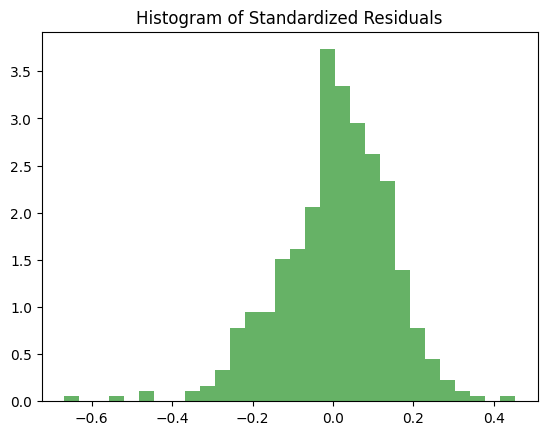

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  9.198034   0.513418


In [ ]:
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox

# GARCH パラメータ
omega = [0.10802023, 0.17427888]
alpha = [0.48373627, 0.1476721]
beta = [0.21238686, 0.33137651]

# 標準化残差の計算（例としてレジーム0のデータを使用）
h_t = np.zeros(len(returns))
residuals = np.zeros(len(returns))

for t in range(1, len(returns)):
    regime = regime_states[t]  # サンプルのレジーム
    h_t[t] = omega[regime] + alpha[regime] * (returns[t-1] ** 2) + beta[regime] * h_t[t-1]
    residuals[t] = returns[t] / np.sqrt(h_t[t])  # 標準化残差

# 標準化残差の分布を確認
import matplotlib.pyplot as plt
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Standardized Residuals')
plt.show()

# 残差の自己相関を確認（Ljung-Box 検定）
lb_test = acorr_ljungbox(residuals[1:], lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", lb_test)


In [ ]:
from scipy.stats import shapiro, jarque_bera

# Shapiro-Wilk検定（残差の正規性を検定）
shapiro_test = shapiro(residuals[1:])

# Jarque-Bera検定（正規性検定）
jb_test = jarque_bera(residuals[1:])

# 結果を表示
{
    "Shapiro-Wilk Test": {"Statistic": shapiro_test.statistic, "p-value": shapiro_test.pvalue},
    "Jarque-Bera Test": {"Statistic": jb_test.statistic, "p-value": jb_test.pvalue}
}


{'Shapiro-Wilk Test': {'Statistic': 0.9765605824358404,
  'p-value': 5.825087372314881e-07},
 'Jarque-Bera Test': {'Statistic': 87.92782970838145,
  'p-value': 8.067043075760094e-20}}

In [ ]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 21.2 MB/s eta 0:00:00


In [ ]:
!pip install funsor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 kB 10.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist
from jax import lax

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # 初期状態
    s_t_init = numpyro.sample("s_0", dist.Bernoulli(0.5))  # 最初のレジーム
    h_t_init = numpyro.sample("h_0", dist.Normal(0, 1))  # 最初のボラティリティ

    # 状態更新の関数
    def transition_fn(carry, t):
        s_prev, h_prev = carry
        # レジームの遷移
        s_t = numpyro.sample(f"s_{t}", dist.Bernoulli(jnp.where(s_prev == 1, p, 1 - q)))
        # ボラティリティの遷移
        h_t = numpyro.sample(f"h_{t}", dist.Normal(jnp.where(s_t == 1, mu_1, mu_0), sigma_eta))
        # リターンの生成
        numpyro.sample(f"log_return_{t}", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns[t])
        return (s_t, h_t), None

    # scanを使って時系列データを処理
    lax.scan(transition_fn, (s_t_init, h_t_init), jnp.arange(1, n))

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape int32[]
The error occurred while tracing the function transition_fn at <ipython-input-41-bf1c256b7cb2>:34 for scan. This concrete value was not available in Python because it depends on the value of the argument t.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # レジーム状態を初期化
    s_t = numpyro.sample("s_0", dist.Bernoulli(0.5))  # 最初のレジーム
    h_t = numpyro.sample("h_0", dist.Normal(0, 1))  # 最初のボラティリティ

    # レジームとボラティリティの動態を生成
    for t in range(1, n):
        # レジームの遷移
        s_t = numpyro.sample(f"s_{t}", dist.Bernoulli(jnp.where(s_t == 1, p, 1 - q)))

        # ボラティリティの遷移
        h_t = numpyro.sample(f"h_{t}", dist.Normal(jnp.where(s_t == 1, mu_1, mu_0), sigma_eta))

        # リターンの生成
        numpyro.sample(f"log_return_{t}", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns[t])

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


<ipython-input-42-a3e59285d5c5>:47: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_0 of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)
<ipython-input-42-a3e59285d5c5>:47: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_1 of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)
<ipython-input-42-a3e59285d5c5>:47: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_2 of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)
<ipython-input-42-a3e59285d5c5>:47: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_3 of your model. In the future, enumerated sites nee

ValueError: Ran out of free dims during allocation for s_25

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # 初期状態
    s_t = 0  # 初期レジーム（0または1）
    h_t = numpyro.sample("h_0", dist.Normal(0, 1))  # 初期ボラティリティ

    # レジームとボラティリティの動態を生成
    for t in range(1, n):
        # レジームの遷移（JAXの乱数を使用）
        rng_key = jax.random.PRNGKey(t)
        s_t = jax.random.bernoulli(rng_key, p if s_t == 1 else 1 - q).astype(int)

        # ボラティリティの遷移
        h_t = numpyro.sample(f"h_{t}", dist.Normal(mu_1 if s_t == 1 else mu_0, sigma_eta))

        # リターンの生成
        numpyro.sample(f"log_return_{t}", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns[t])

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


  0%|          | 0/1500 [00:02<?, ?it/s]


TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[].
The error occurred while tracing the function _body_fn at /usr/local/lib/python3.10/dist-packages/numpyro/infer/hmc_util.py:1003 for while_loop. This concrete value was not available in Python because it depends on the values of the arguments state[0].z_left['h_0'], state[0].z_left['h_1'], state[0].z_left['h_10'], state[0].z_left['h_100'], state[0].z_left['h_101'], state[0].z_left['h_102'], state[0].z_left['h_103'], state[0].z_left['h_104'], state[0].z_left['h_105'], state[0].z_left['h_106'], state[0].z_left['h_107'], state[0].z_left['h_108'], state[0].z_left['h_109'], state[0].z_left['h_11'], state[0].z_left['h_110'], state[0].z_left['h_111'], state[0].z_left['h_112'], state[0].z_left['h_113'], state[0].z_left['h_114'], state[0].z_left['h_115'], state[0].z_left['h_116'], state[0].z_left['h_117'], state[0].z_left['h_118'], state[0].z_left['h_119'], state[0].z_left['h_12'], state[0].z_left['h_120'], state[0].z_left['h_121'], state[0].z_left['h_122'], state[0].z_left['h_123'], state[0].z_left['h_124'], state[0].z_left['h_125'], state[0].z_left['h_126'], state[0].z_left['h_127'], state[0].z_left['h_128'], state[0].z_left['h_129'], state[0].z_left['h_13'], state[0].z_left['h_130'], state[0].z_left['h_131'], state[0].z_left['h_132'], state[0].z_left['h_133'], state[0].z_left['h_134'], state[0].z_left['h_135'], state[0].z_left['h_136'], state[0].z_left['h_137'], state[0].z_left['h_138'], state[0].z_left['h_139'], state[0].z_left['h_14'], state[0].z_left['h_140'], state[0].z_left['h_141'], state[0].z_left['h_142'], state[0].z_left['h_143'], state[0].z_left['h_144'], state[0].z_left['h_145'], state[0].z_left['h_146'], state[0].z_left['h_147'], state[0].z_left['h_148'], state[0].z_left['h_149'], state[0].z_left['h_15'], state[0].z_left['h_150'], state[0].z_left['h_151'], state[0].z_left['h_152'], state[0].z_left['h_153'], state[0].z_left['h_154'], state[0].z_left['h_155'], state[0].z_left['h_156'], state[0].z_left['h_157'], state[0].z_left['h_158'], state[0].z_left['h_159'], state[0].z_left['h_16'], state[0].z_left['h_160'], state[0].z_left['h_161'], state[0].z_left['h_162'], state[0].z_left['h_163'], state[0].z_left['h_164'], state[0].z_left['h_165'], state[0].z_left['h_166'], state[0].z_left['h_167'], state[0].z_left['h_168'], state[0].z_left['h_169'], state[0].z_left['h_17'], state[0].z_left['h_170'], state[0].z_left['h_171'], state[0].z_left['h_172'], state[0].z_left['h_173'], state[0].z_left['h_174'], state[0].z_left['h_175'], state[0].z_left['h_176'], state[0].z_left['h_177'], state[0].z_left['h_178'], state[0].z_left['h_179'], state[0].z_left['h_18'], state[0].z_left['h_180'], state[0].z_left['h_181'], state[0].z_left['h_182'], state[0].z_left['h_183'], state[0].z_left['h_184'], state[0].z_left['h_185'], state[0].z_left['h_186'], state[0].z_left['h_187'], state[0].z_left['h_188'], state[0].z_left['h_189'], state[0].z_left['h_19'], state[0].z_left['h_190'], state[0].z_left['h_191'], state[0].z_left['h_192'], state[0].z_left['h_193'], state[0].z_left['h_194'], state[0].z_left['h_195'], state[0].z_left['h_196'], state[0].z_left['h_197'], state[0].z_left['h_198'], state[0].z_left['h_199'], state[0].z_left['h_2'], state[0].z_left['h_20'], state[0].z_left['h_200'], state[0].z_left['h_201'], state[0].z_left['h_202'], state[0].z_left['h_203'], state[0].z_left['h_204'], state[0].z_left['h_205'], state[0].z_left['h_206'], state[0].z_left['h_207'], state[0].z_left['h_208'], state[0].z_left['h_209'], state[0].z_left['h_21'], state[0].z_left['h_210'], state[0].z_left['h_211'], state[0].z_left['h_212'], state[0].z_left['h_213'], state[0].z_left['h_214'], state[0].z_left['h_215'], state[0].z_left['h_216'], state[0].z_left['h_217'], state[0].z_left['h_218'], state[0].z_left['h_219'], state[0].z_left['h_22'], state[0].z_left['h_220'], state[0].z_left['h_221'], state[0].z_left['h_222'], state[0].z_left['h_223'], state[0].z_left['h_224'], state[0].z_left['h_225'], state[0].z_left['h_226'], state[0].z_left['h_227'], state[0].z_left['h_228'], state[0].z_left['h_229'], state[0].z_left['h_23'], state[0].z_left['h_230'], state[0].z_left['h_231'], state[0].z_left['h_232'], state[0].z_left['h_233'], state[0].z_left['h_234'], state[0].z_left['h_235'], state[0].z_left['h_236'], state[0].z_left['h_237'], state[0].z_left['h_238'], state[0].z_left['h_239'], state[0].z_left['h_24'], state[0].z_left['h_240'], state[0].z_left['h_241'], state[0].z_left['h_242'], state[0].z_left['h_243'], state[0].z_left['h_244'], state[0].z_left['h_245'], state[0].z_left['h_246'], state[0].z_left['h_247'], state[0].z_left['h_248'], state[0].z_left['h_249'], state[0].z_left['h_25'], state[0].z_left['h_250'], state[0].z_left['h_251'], state[0].z_left['h_252'], state[0].z_left['h_253'], state[0].z_left['h_254'], state[0].z_left['h_255'], state[0].z_left['h_256'], state[0].z_left['h_257'], state[0].z_left['h_258'], state[0].z_left['h_259'], state[0].z_left['h_26'], state[0].z_left['h_260'], state[0].z_left['h_261'], state[0].z_left['h_262'], state[0].z_left['h_263'], state[0].z_left['h_264'], state[0].z_left['h_265'], state[0].z_left['h_266'], state[0].z_left['h_267'], state[0].z_left['h_268'], state[0].z_left['h_269'], state[0].z_left['h_27'], state[0].z_left['h_270'], state[0].z_left['h_271'], state[0].z_left['h_272'], state[0].z_left['h_273'], state[0].z_left['h_274'], state[0].z_left['h_275'], state[0].z_left['h_276'], state[0].z_left['h_277'], state[0].z_left['h_278'], state[0].z_left['h_279'], state[0].z_left['h_28'], state[0].z_left['h_280'], state[0].z_left['h_281'], state[0].z_left['h_282'], state[0].z_left['h_283'], state[0].z_left['h_284'], state[0].z_left['h_285'], state[0].z_left['h_286'], state[0].z_left['h_287'], state[0].z_left['h_288'], state[0].z_left['h_289'], state[0].z_left['h_29'], state[0].z_left['h_290'], state[0].z_left['h_291'], state[0].z_left['h_292'], state[0].z_left['h_293'], state[0].z_left['h_294'], state[0].z_left['h_295'], state[0].z_left['h_296'], state[0].z_left['h_297'], state[0].z_left['h_298'], state[0].z_left['h_299'], state[0].z_left['h_3'], state[0].z_left['h_30'], state[0].z_left['h_300'], state[0].z_left['h_301'], state[0].z_left['h_302'], state[0].z_left['h_303'], state[0].z_left['h_304'], state[0].z_left['h_305'], state[0].z_left['h_306'], state[0].z_left['h_307'], state[0].z_left['h_308'], state[0].z_left['h_309'], state[0].z_left['h_31'], state[0].z_left['h_310'], state[0].z_left['h_311'], state[0].z_left['h_312'], state[0].z_left['h_313'], state[0].z_left['h_314'], state[0].z_left['h_315'], state[0].z_left['h_316'], state[0].z_left['h_317'], state[0].z_left['h_318'], state[0].z_left['h_319'], state[0].z_left['h_32'], state[0].z_left['h_320'], state[0].z_left['h_321'], state[0].z_left['h_322'], state[0].z_left['h_323'], state[0].z_left['h_324'], state[0].z_left['h_325'], state[0].z_left['h_326'], state[0].z_left['h_327'], state[0].z_left['h_328'], state[0].z_left['h_329'], state[0].z_left['h_33'], state[0].z_left['h_330'], state[0].z_left['h_331'], state[0].z_left['h_332'], state[0].z_left['h_333'], state[0].z_left['h_334'], state[0].z_left['h_335'], state[0].z_left['h_336'], state[0].z_left['h_337'], state[0].z_left['h_338'], state[0].z_left['h_339'], state[0].z_left['h_34'], state[0].z_left['h_340'], state[0].z_left['h_341'], state[0].z_left['h_342'], state[0].z_left['h_343'], state[0].z_left['h_344'], state[0].z_left['h_345'], state[0].z_left['h_346'], state[0].z_left['h_347'], state[0].z_left['h_348'], state[0].z_left['h_349'], state[0].z_left['h_35'], state[0].z_left['h_350'], state[0].z_left['h_351'], state[0].z_left['h_352'], state[0].z_left['h_353'], state[0].z_left['h_354'], state[0].z_left['h_355'], state[0].z_left['h_356'], state[0].z_left['h_357'], state[0].z_left['h_358'], state[0].z_left['h_359'], state[0].z_left['h_36'], state[0].z_left['h_360'], state[0].z_left['h_361'], state[0].z_left['h_362'], state[0].z_left['h_363'], state[0].z_left['h_364'], state[0].z_left['h_365'], state[0].z_left['h_366'], state[0].z_left['h_367'], state[0].z_left['h_368'], state[0].z_left['h_369'], state[0].z_left['h_37'], state[0].z_left['h_370'], state[0].z_left['h_371'], state[0].z_left['h_372'], state[0].z_left['h_373'], state[0].z_left['h_374'], state[0].z_left['h_375'], state[0].z_left['h_376'], state[0].z_left['h_377'], state[0].z_left['h_378'], state[0].z_left['h_379'], state[0].z_left['h_38'], state[0].z_left['h_380'], state[0].z_left['h_381'], state[0].z_left['h_382'], state[0].z_left['h_383'], state[0].z_left['h_384'], state[0].z_left['h_385'], state[0].z_left['h_386'], state[0].z_left['h_387'], state[0].z_left['h_388'], state[0].z_left['h_389'], state[0].z_left['h_39'], state[0].z_left['h_390'], state[0].z_left['h_391'], state[0].z_left['h_392'], state[0].z_left['h_393'], state[0].z_left['h_394'], state[0].z_left['h_395'], state[0].z_left['h_396'], state[0].z_left['h_397'], state[0].z_left['h_398'], state[0].z_left['h_399'], state[0].z_left['h_4'], state[0].z_left['h_40'], state[0].z_left['h_400'], state[0].z_left['h_401'], state[0].z_left['h_402'], state[0].z_left['h_403'], state[0].z_left['h_404'], state[0].z_left['h_405'], state[0].z_left['h_406'], state[0].z_left['h_407'], state[0].z_left['h_408'], state[0].z_left['h_409'], state[0].z_left['h_41'], state[0].z_left['h_410'], state[0].z_left['h_411'], state[0].z_left['h_412'], state[0].z_left['h_413'], state[0].z_left['h_414'], state[0].z_left['h_415'], state[0].z_left['h_416'], state[0].z_left['h_417'], state[0].z_left['h_418'], state[0].z_left['h_419'], state[0].z_left['h_42'], state[0].z_left['h_420'], state[0].z_left['h_421'], state[0].z_left['h_422'], state[0].z_left['h_423'], state[0].z_left['h_424'], state[0].z_left['h_425'], state[0].z_left['h_426'], state[0].z_left['h_427'], state[0].z_left['h_428'], state[0].z_left['h_429'], state[0].z_left['h_43'], state[0].z_left['h_430'], state[0].z_left['h_431'], state[0].z_left['h_432'], state[0].z_left['h_433'], state[0].z_left['h_434'], state[0].z_left['h_435'], state[0].z_left['h_436'], state[0].z_left['h_437'], state[0].z_left['h_438'], state[0].z_left['h_439'], state[0].z_left['h_44'], state[0].z_left['h_440'], state[0].z_left['h_441'], state[0].z_left['h_442'], state[0].z_left['h_443'], state[0].z_left['h_444'], state[0].z_left['h_445'], state[0].z_left['h_446'], state[0].z_left['h_447'], state[0].z_left['h_448'], state[0].z_left['h_449'], state[0].z_left['h_45'], state[0].z_left['h_450'], state[0].z_left['h_451'], state[0].z_left['h_452'], state[0].z_left['h_453'], state[0].z_left['h_454'], state[0].z_left['h_455'], state[0].z_left['h_456'], state[0].z_left['h_457'], state[0].z_left['h_458'], state[0].z_left['h_459'], state[0].z_left['h_46'], state[0].z_left['h_460'], state[0].z_left['h_461'], state[0].z_left['h_462'], state[0].z_left['h_463'], state[0].z_left['h_464'], state[0].z_left['h_465'], state[0].z_left['h_466'], state[0].z_left['h_467'], state[0].z_left['h_468'], state[0].z_left['h_469'], state[0].z_left['h_47'], state[0].z_left['h_470'], state[0].z_left['h_471'], state[0].z_left['h_472'], state[0].z_left['h_473'], state[0].z_left['h_474'], state[0].z_left['h_475'], state[0].z_left['h_476'], state[0].z_left['h_477'], state[0].z_left['h_478'], state[0].z_left['h_479'], state[0].z_left['h_48'], state[0].z_left['h_49'], state[0].z_left['h_5'], state[0].z_left['h_50'], state[0].z_left['h_51'], state[0].z_left['h_52'], state[0].z_left['h_53'], state[0].z_left['h_54'], state[0].z_left['h_55'], state[0].z_left['h_56'], state[0].z_left['h_57'], state[0].z_left['h_58'], state[0].z_left['h_59'], state[0].z_left['h_6'], state[0].z_left['h_60'], state[0].z_left['h_61'], state[0].z_left['h_62'], state[0].z_left['h_63'], state[0].z_left['h_64'], state[0].z_left['h_65'], state[0].z_left['h_66'], state[0].z_left['h_67'], state[0].z_left['h_68'], state[0].z_left['h_69'], state[0].z_left['h_7'], state[0].z_left['h_70'], state[0].z_left['h_71'], state[0].z_left['h_72'], state[0].z_left['h_73'], state[0].z_left['h_74'], state[0].z_left['h_75'], state[0].z_left['h_76'], state[0].z_left['h_77'], state[0].z_left['h_78'], state[0].z_left['h_79'], state[0].z_left['h_8'], state[0].z_left['h_80'], state[0].z_left['h_81'], state[0].z_left['h_82'], state[0].z_left['h_83'], state[0].z_left['h_84'], state[0].z_left['h_85'], state[0].z_left['h_86'], state[0].z_left['h_87'], state[0].z_left['h_88'], state[0].z_left['h_89'], state[0].z_left['h_9'], state[0].z_left['h_90'], state[0].z_left['h_91'], state[0].z_left['h_92'], state[0].z_left['h_93'], state[0].z_left['h_94'], state[0].z_left['h_95'], state[0].z_left['h_96'], state[0].z_left['h_97'], state[0].z_left['h_98'], state[0].z_left['h_99'], state[0].z_left['mu_0'], state[0].z_left['mu_1'], state[0].z_left['p'], state[0].z_left['phi'], state[0].z_left['q'], state[0].z_left['sigma_eta'], state[0].r_left['h_0'], state[0].r_left['h_1'], state[0].r_left['h_10'], state[0].r_left['h_100'], state[0].r_left['h_101'], state[0].r_left['h_102'], state[0].r_left['h_103'], state[0].r_left['h_104'], state[0].r_left['h_105'], state[0].r_left['h_106'], state[0].r_left['h_107'], state[0].r_left['h_108'], state[0].r_left['h_109'], state[0].r_left['h_11'], state[0].r_left['h_110'], state[0].r_left['h_111'], state[0].r_left['h_112'], state[0].r_left['h_113'], state[0].r_left['h_114'], state[0].r_left['h_115'], state[0].r_left['h_116'], state[0].r_left['h_117'], state[0].r_left['h_118'], state[0].r_left['h_119'], state[0].r_left['h_12'], state[0].r_left['h_120'], state[0].r_left['h_121'], state[0].r_left['h_122'], state[0].r_left['h_123'], state[0].r_left['h_124'], state[0].r_left['h_125'], state[0].r_left['h_126'], state[0].r_left['h_127'], state[0].r_left['h_128'], state[0].r_left['h_129'], state[0].r_left['h_13'], state[0].r_left['h_130'], state[0].r_left['h_131'], state[0].r_left['h_132'], state[0].r_left['h_133'], state[0].r_left['h_134'], state[0].r_left['h_135'], state[0].r_left['h_136'], state[0].r_left['h_137'], state[0].r_left['h_138'], state[0].r_left['h_139'], state[0].r_left['h_14'], state[0].r_left['h_140'], state[0].r_left['h_141'], state[0].r_left['h_142'], state[0].r_left['h_143'], state[0].r_left['h_144'], state[0].r_left['h_145'], state[0].r_left['h_146'], state[0].r_left['h_147'], state[0].r_left['h_148'], state[0].r_left['h_149'], state[0].r_left['h_15'], state[0].r_left['h_150'], state[0].r_left['h_151'], state[0].r_left['h_152'], state[0].r_left['h_153'], state[0].r_left['h_154'], state[0].r_left['h_155'], state[0].r_left['h_156'], state[0].r_left['h_157'], state[0].r_left['h_158'], state[0].r_left['h_159'], state[0].r_left['h_16'], state[0].r_left['h_160'], state[0].r_left['h_161'], state[0].r_left['h_162'], state[0].r_left['h_163'], state[0].r_left['h_164'], state[0].r_left['h_165'], state[0].r_left['h_166'], state[0].r_left['h_167'], state[0].r_left['h_168'], state[0].r_left['h_169'], state[0].r_left['h_17'], state[0].r_left['h_170'], state[0].r_left['h_171'], state[0].r_left['h_172'], state[0].r_left['h_173'], state[0].r_left['h_174'], state[0].r_left['h_175'], state[0].r_left['h_176'], state[0].r_left['h_177'], state[0].r_left['h_178'], state[0].r_left['h_179'], state[0].r_left['h_18'], state[0].r_left['h_180'], state[0].r_left['h_181'], state[0].r_left['h_182'], state[0].r_left['h_183'], state[0].r_left['h_184'], state[0].r_left['h_185'], state[0].r_left['h_186'], state[0].r_left['h_187'], state[0].r_left['h_188'], state[0].r_left['h_189'], state[0].r_left['h_19'], state[0].r_left['h_190'], state[0].r_left['h_191'], state[0].r_left['h_192'], state[0].r_left['h_193'], state[0].r_left['h_194'], state[0].r_left['h_195'], state[0].r_left['h_196'], state[0].r_left['h_197'], state[0].r_left['h_198'], state[0].r_left['h_199'], state[0].r_left['h_2'], state[0].r_left['h_20'], state[0].r_left['h_200'], state[0].r_left['h_201'], state[0].r_left['h_202'], state[0].r_left['h_203'], state[0].r_left['h_204'], state[0].r_left['h_205'], state[0].r_left['h_206'], state[0].r_left['h_207'], state[0].r_left['h_208'], state[0].r_left['h_209'], state[0].r_left['h_21'], state[0].r_left['h_210'], state[0].r_left['h_211'], state[0].r_left['h_212'], state[0].r_left['h_213'], state[0].r_left['h_214'], state[0].r_left['h_215'], state[0].r_left['h_216'], state[0].r_left['h_217'], state[0].r_left['h_218'], state[0].r_left['h_219'], state[0].r_left['h_22'], state[0].r_left['h_220'], state[0].r_left['h_221'], state[0].r_left['h_222'], state[0].r_left['h_223'], state[0].r_left['h_224'], state[0].r_left['h_225'], state[0].r_left['h_226'], state[0].r_left['h_227'], state[0].r_left['h_228'], state[0].r_left['h_229'], state[0].r_left['h_23'], state[0].r_left['h_230'], state[0].r_left['h_231'], state[0].r_left['h_232'], state[0].r_left['h_233'], state[0].r_left['h_234'], state[0].r_left['h_235'], state[0].r_left['h_236'], state[0].r_left['h_237'], state[0].r_left['h_238'], state[0].r_left['h_239'], state[0].r_left['h_24'], state[0].r_left['h_240'], state[0].r_left['h_241'], state[0].r_left['h_242'], state[0].r_left['h_243'], state[0].r_left['h_244'], state[0].r_left['h_245'], state[0].r_left['h_246'], state[0].r_left['h_247'], state[0].r_left['h_248'], state[0].r_left['h_249'], state[0].r_left['h_25'], state[0].r_left['h_250'], state[0].r_left['h_251'], state[0].r_left['h_252'], state[0].r_left['h_253'], state[0].r_left['h_254'], state[0].r_left['h_255'], state[0].r_left['h_256'], state[0].r_left['h_257'], state[0].r_left['h_258'], state[0].r_left['h_259'], state[0].r_left['h_26'], state[0].r_left['h_260'], state[0].r_left['h_261'], state[0].r_left['h_262'], state[0].r_left['h_263'], state[0].r_left['h_264'], state[0].r_left['h_265'], state[0].r_left['h_266'], state[0].r_left['h_267'], state[0].r_left['h_268'], state[0].r_left['h_269'], state[0].r_left['h_27'], state[0].r_left['h_270'], state[0].r_left['h_271'], state[0].r_left['h_272'], state[0].r_left['h_273'], state[0].r_left['h_274'], state[0].r_left['h_275'], state[0].r_left['h_276'], state[0].r_left['h_277'], state[0].r_left['h_278'], state[0].r_left['h_279'], state[0].r_left['h_28'], state[0].r_left['h_280'], state[0].r_left['h_281'], state[0].r_left['h_282'], state[0].r_left['h_283'], state[0].r_left['h_284'], state[0].r_left['h_285'], state[0].r_left['h_286'], state[0].r_left['h_287'], state[0].r_left['h_288'], state[0].r_left['h_289'], state[0].r_left['h_29'], state[0].r_left['h_290'], state[0].r_left['h_291'], state[0].r_left['h_292'], state[0].r_left['h_293'], state[0].r_left['h_294'], state[0].r_left['h_295'], state[0].r_left['h_296'], state[0].r_left['h_297'], state[0].r_left['h_298'], state[0].r_left['h_299'], state[0].r_left['h_3'], state[0].r_left['h_30'], state[0].r_left['h_300'], state[0].r_left['h_301'], state[0].r_left['h_302'], state[0].r_left['h_303'], state[0].r_left['h_304'], state[0].r_left['h_305'], state[0].r_left['h_306'], state[0].r_left['h_307'], state[0].r_left['h_308'], state[0].r_left['h_309'], state[0].r_left['h_31'], state[0].r_left['h_310'], state[0].r_left['h_311'], state[0].r_left['h_312'], state[0].r_left['h_313'], state[0].r_left['h_314'], state[0].r_left['h_315'], state[0].r_left['h_316'], state[0].r_left['h_317'], state[0].r_left['h_318'], state[0].r_left['h_319'], state[0].r_left['h_32'], state[0].r_left['h_320'], state[0].r_left['h_321'], state[0].r_left['h_322'], state[0].r_left['h_323'], state[0].r_left['h_324'], state[0].r_left['h_325'], state[0].r_left['h_326'], state[0].r_left['h_327'], state[0].r_left['h_328'], state[0].r_left['h_329'], state[0].r_left['h_33'], state[0].r_left['h_330'], state[0].r_left['h_331'], state[0].r_left['h_332'], state[0].r_left['h_333'], state[0].r_left['h_334'], state[0].r_left['h_335'], state[0].r_left['h_336'], state[0].r_left['h_337'], state[0].r_left['h_338'], state[0].r_left['h_339'], state[0].r_left['h_34'], state[0].r_left['h_340'], state[0].r_left['h_341'], state[0].r_left['h_342'], state[0].r_left['h_343'], state[0].r_left['h_344'], state[0].r_left['h_345'], state[0].r_left['h_346'], state[0].r_left['h_347'], state[0].r_left['h_348'], state[0].r_left['h_349'], state[0].r_left['h_35'], state[0].r_left['h_350'], state[0].r_left['h_351'], state[0].r_left['h_352'], state[0].r_left['h_353'], state[0].r_left['h_354'], state[0].r_left['h_355'], state[0].r_left['h_356'], state[0].r_left['h_357'], state[0].r_left['h_358'], state[0].r_left['h_359'], state[0].r_left['h_36'], state[0].r_left['h_360'], state[0].r_left['h_361'], state[0].r_left['h_362'], state[0].r_left['h_363'], state[0].r_left['h_364'], state[0].r_left['h_365'], state[0].r_left['h_366'], state[0].r_left['h_367'], state[0].r_left['h_368'], state[0].r_left['h_369'], state[0].r_left['h_37'], state[0].r_left['h_370'], state[0].r_left['h_371'], state[0].r_left['h_372'], state[0].r_left['h_373'], state[0].r_left['h_374'], state[0].r_left['h_375'], state[0].r_left['h_376'], state[0].r_left['h_377'], state[0].r_left['h_378'], state[0].r_left['h_379'], state[0].r_left['h_38'], state[0].r_left['h_380'], state[0].r_left['h_381'], state[0].r_left['h_382'], state[0].r_left['h_383'], state[0].r_left['h_384'], state[0].r_left['h_385'], state[0].r_left['h_386'], state[0].r_left['h_387'], state[0].r_left['h_388'], state[0].r_left['h_389'], state[0].r_left['h_39'], state[0].r_left['h_390'], state[0].r_left['h_391'], state[0].r_left['h_392'], state[0].r_left['h_393'], state[0].r_left['h_394'], state[0].r_left['h_395'], state[0].r_left['h_396'], state[0].r_left['h_397'], state[0].r_left['h_398'], state[0].r_left['h_399'], state[0].r_left['h_4'], state[0].r_left['h_40'], state[0].r_left['h_400'], state[0].r_left['h_401'], state[0].r_left['h_402'], state[0].r_left['h_403'], state[0].r_left['h_404'], state[0].r_left['h_405'], state[0].r_left['h_406'], state[0].r_left['h_407'], state[0].r_left['h_408'], state[0].r_left['h_409'], state[0].r_left['h_41'], state[0].r_left['h_410'], state[0].r_left['h_411'], state[0].r_left['h_412'], state[0].r_left['h_413'], state[0].r_left['h_414'], state[0].r_left['h_415'], state[0].r_left['h_416'], state[0].r_left['h_417'], state[0].r_left['h_418'], state[0].r_left['h_419'], state[0].r_left['h_42'], state[0].r_left['h_420'], state[0].r_left['h_421'], state[0].r_left['h_422'], state[0].r_left['h_423'], state[0].r_left['h_424'], state[0].r_left['h_425'], state[0].r_left['h_426'], state[0].r_left['h_427'], state[0].r_left['h_428'], state[0].r_left['h_429'], state[0].r_left['h_43'], state[0].r_left['h_430'], state[0].r_left['h_431'], state[0].r_left['h_432'], state[0].r_left['h_433'], state[0].r_left['h_434'], state[0].r_left['h_435'], state[0].r_left['h_436'], state[0].r_left['h_437'], state[0].r_left['h_438'], state[0].r_left['h_439'], state[0].r_left['h_44'], state[0].r_left['h_440'], state[0].r_left['h_441'], state[0].r_left['h_442'], state[0].r_left['h_443'], state[0].r_left['h_444'], state[0].r_left['h_445'], state[0].r_left['h_446'], state[0].r_left['h_447'], state[0].r_left['h_448'], state[0].r_left['h_449'], state[0].r_left['h_45'], state[0].r_left['h_450'], state[0].r_left['h_451'], state[0].r_left['h_452'], state[0].r_left['h_453'], state[0].r_left['h_454'], state[0].r_left['h_455'], state[0].r_left['h_456'], state[0].r_left['h_457'], state[0].r_left['h_458'], state[0].r_left['h_459'], state[0].r_left['h_46'], state[0].r_left['h_460'], state[0].r_left['h_461'], state[0].r_left['h_462'], state[0].r_left['h_463'], state[0].r_left['h_464'], state[0].r_left['h_465'], state[0].r_left['h_466'], state[0].r_left['h_467'], state[0].r_left['h_468'], state[0].r_left['h_469'], state[0].r_left['h_47'], state[0].r_left['h_470'], state[0].r_left['h_471'], state[0].r_left['h_472'], state[0].r_left['h_473'], state[0].r_left['h_474'], state[0].r_left['h_475'], state[0].r_left['h_476'], state[0].r_left['h_477'], state[0].r_left['h_478'], state[0].r_left['h_479'], state[0].r_left['h_48'], state[0].r_left['h_49'], state[0].r_left['h_5'], state[0].r_left['h_50'], state[0].r_left['h_51'], state[0].r_left['h_52'], state[0].r_left['h_53'], state[0].r_left['h_54'], state[0].r_left['h_55'], state[0].r_left['h_56'], state[0].r_left['h_57'], state[0].r_left['h_58'], state[0].r_left['h_59'], state[0].r_left['h_6'], state[0].r_left['h_60'], state[0].r_left['h_61'], state[0].r_left['h_62'], state[0].r_left['h_63'], state[0].r_left['h_64'], state[0].r_left['h_65'], state[0].r_left['h_66'], state[0].r_left['h_67'], state[0].r_left['h_68'], state[0].r_left['h_69'], state[0].r_left['h_7'], state[0].r_left['h_70'], state[0].r_left['h_71'], state[0].r_left['h_72'], state[0].r_left['h_73'], state[0].r_left['h_74'], state[0].r_left['h_75'], state[0].r_left['h_76'], state[0].r_left['h_77'], state[0].r_left['h_78'], state[0].r_left['h_79'], state[0].r_left['h_8'], state[0].r_left['h_80'], state[0].r_left['h_81'], state[0].r_left['h_82'], state[0].r_left['h_83'], state[0].r_left['h_84'], state[0].r_left['h_85'], state[0].r_left['h_86'], state[0].r_left['h_87'], state[0].r_left['h_88'], state[0].r_left['h_89'], state[0].r_left['h_9'], state[0].r_left['h_90'], state[0].r_left['h_91'], state[0].r_left['h_92'], state[0].r_left['h_93'], state[0].r_left['h_94'], state[0].r_left['h_95'], state[0].r_left['h_96'], state[0].r_left['h_97'], state[0].r_left['h_98'], state[0].r_left['h_99'], state[0].r_left['mu_0'], state[0].r_left['mu_1'], state[0].r_left['p'], state[0].r_left['phi'], state[0].r_left['q'], state[0].r_left['sigma_eta'], state[0].z_left_grad['h_0'], state[0].z_left_grad['h_1'], state[0].z_left_grad['h_10'], state[0].z_left_grad['h_100'], state[0].z_left_grad['h_101'], state[0].z_left_grad['h_102'], state[0].z_left_grad['h_103'], state[0].z_left_grad['h_104'], state[0].z_left_grad['h_105'], state[0].z_left_grad['h_106'], state[0].z_left_grad['h_107'], state[0].z_left_grad['h_108'], state[0].z_left_grad['h_109'], state[0].z_left_grad['h_11'], state[0].z_left_grad['h_110'], state[0].z_left_grad['h_111'], state[0].z_left_grad['h_112'], state[0].z_left_grad['h_113'], state[0].z_left_grad['h_114'], state[0].z_left_grad['h_115'], state[0].z_left_grad['h_116'], state[0].z_left_grad['h_117'], state[0].z_left_grad['h_118'], state[0].z_left_grad['h_119'], state[0].z_left_grad['h_12'], state[0].z_left_grad['h_120'], state[0].z_left_grad['h_121'], state[0].z_left_grad['h_122'], state[0].z_left_grad['h_123'], state[0].z_left_grad['h_124'], state[0].z_left_grad['h_125'], state[0].z_left_grad['h_126'], state[0].z_left_grad['h_127'], state[0].z_left_grad['h_128'], state[0].z_left_grad['h_129'], state[0].z_left_grad['h_13'], state[0].z_left_grad['h_130'], state[0].z_left_grad['h_131'], state[0].z_left_grad['h_132'], state[0].z_left_grad['h_133'], state[0].z_left_grad['h_134'], state[0].z_left_grad['h_135'], state[0].z_left_grad['h_136'], state[0].z_left_grad['h_137'], state[0].z_left_grad['h_138'], state[0].z_left_grad['h_139'], state[0].z_left_grad['h_14'], state[0].z_left_grad['h_140'], state[0].z_left_grad['h_141'], state[0].z_left_grad['h_142'], state[0].z_left_grad['h_143'], state[0].z_left_grad['h_144'], state[0].z_left_grad['h_145'], state[0].z_left_grad['h_146'], state[0].z_left_grad['h_147'], state[0].z_left_grad['h_148'], state[0].z_left_grad['h_149'], state[0].z_left_grad['h_15'], state[0].z_left_grad['h_150'], state[0].z_left_grad['h_151'], state[0].z_left_grad['h_152'], state[0].z_left_grad['h_153'], state[0].z_left_grad['h_154'], state[0].z_left_grad['h_155'], state[0].z_left_grad['h_156'], state[0].z_left_grad['h_157'], state[0].z_left_grad['h_158'], state[0].z_left_grad['h_159'], state[0].z_left_grad['h_16'], state[0].z_left_grad['h_160'], state[0].z_left_grad['h_161'], state[0].z_left_grad['h_162'], state[0].z_left_grad['h_163'], state[0].z_left_grad['h_164'], state[0].z_left_grad['h_165'], state[0].z_left_grad['h_166'], state[0].z_left_grad['h_167'], state[0].z_left_grad['h_168'], state[0].z_left_grad['h_169'], state[0].z_left_grad['h_17'], state[0].z_left_grad['h_170'], state[0].z_left_grad['h_171'], state[0].z_left_grad['h_172'], state[0].z_left_grad['h_173'], state[0].z_left_grad['h_174'], state[0].z_left_grad['h_175'], state[0].z_left_grad['h_176'], state[0].z_left_grad['h_177'], state[0].z_left_grad['h_178'], state[0].z_left_grad['h_179'], state[0].z_left_grad['h_18'], state[0].z_left_grad['h_180'], state[0].z_left_grad['h_181'], state[0].z_left_grad['h_182'], state[0].z_left_grad['h_183'], state[0].z_left_grad['h_184'], state[0].z_left_grad['h_185'], state[0].z_left_grad['h_186'], state[0].z_left_grad['h_187'], state[0].z_left_grad['h_188'], state[0].z_left_grad['h_189'], state[0].z_left_grad['h_19'], state[0].z_left_grad['h_190'], state[0].z_left_grad['h_191'], state[0].z_left_grad['h_192'], state[0].z_left_grad['h_193'], state[0].z_left_grad['h_194'], state[0].z_left_grad['h_195'], state[0].z_left_grad['h_196'], state[0].z_left_grad['h_197'], state[0].z_left_grad['h_198'], state[0].z_left_grad['h_199'], state[0].z_left_grad['h_2'], state[0].z_left_grad['h_20'], state[0].z_left_grad['h_200'], state[0].z_left_grad['h_201'], state[0].z_left_grad['h_202'], state[0].z_left_grad['h_203'], state[0].z_left_grad['h_204'], state[0].z_left_grad['h_205'], state[0].z_left_grad['h_206'], state[0].z_left_grad['h_207'], state[0].z_left_grad['h_208'], state[0].z_left_grad['h_209'], state[0].z_left_grad['h_21'], state[0].z_left_grad['h_210'], state[0].z_left_grad['h_211'], state[0].z_left_grad['h_212'], state[0].z_left_grad['h_213'], state[0].z_left_grad['h_214'], state[0].z_left_grad['h_215'], state[0].z_left_grad['h_216'], state[0].z_left_grad['h_217'], state[0].z_left_grad['h_218'], state[0].z_left_grad['h_219'], state[0].z_left_grad['h_22'], state[0].z_left_grad['h_220'], state[0].z_left_grad['h_221'], state[0].z_left_grad['h_222'], state[0].z_left_grad['h_223'], state[0].z_left_grad['h_224'], state[0].z_left_grad['h_225'], state[0].z_left_grad['h_226'], state[0].z_left_grad['h_227'], state[0].z_left_grad['h_228'], state[0].z_left_grad['h_229'], state[0].z_left_grad['h_23'], state[0].z_left_grad['h_230'], state[0].z_left_grad['h_231'], state[0].z_left_grad['h_232'], state[0].z_left_grad['h_233'], state[0].z_left_grad['h_234'], state[0].z_left_grad['h_235'], state[0].z_left_grad['h_236'], state[0].z_left_grad['h_237'], state[0].z_left_grad['h_238'], state[0].z_left_grad['h_239'], state[0].z_left_grad['h_24'], state[0].z_left_grad['h_240'], state[0].z_left_grad['h_241'], state[0].z_left_grad['h_242'], state[0].z_left_grad['h_243'], state[0].z_left_grad['h_244'], state[0].z_left_grad['h_245'], state[0].z_left_grad['h_246'], state[0].z_left_grad['h_247'], state[0].z_left_grad['h_248'], state[0].z_left_grad['h_249'], state[0].z_left_grad['h_25'], state[0].z_left_grad['h_250'], state[0].z_left_grad['h_251'], state[0].z_left_grad['h_252'], state[0].z_left_grad['h_253'], state[0].z_left_grad['h_254'], state[0].z_left_grad['h_255'], state[0].z_left_grad['h_256'], state[0].z_left_grad['h_257'], state[0].z_left_grad['h_258'], state[0].z_left_grad['h_259'], state[0].z_left_grad['h_26'], state[0].z_left_grad['h_260'], state[0].z_left_grad['h_261'], state[0].z_left_grad['h_262'], state[0].z_left_grad['h_263'], state[0].z_left_grad['h_264'], state[0].z_left_grad['h_265'], state[0].z_left_grad['h_266'], state[0].z_left_grad['h_267'], state[0].z_left_grad['h_268'], state[0].z_left_grad['h_269'], state[0].z_left_grad['h_27'], state[0].z_left_grad['h_270'], state[0].z_left_grad['h_271'], state[0].z_left_grad['h_272'], state[0].z_left_grad['h_273'], state[0].z_left_grad['h_274'], state[0].z_left_grad['h_275'], state[0].z_left_grad['h_276'], state[0].z_left_grad['h_277'], state[0].z_left_grad['h_278'], state[0].z_left_grad['h_279'], state[0].z_left_grad['h_28'], state[0].z_left_grad['h_280'], state[0].z_left_grad['h_281'], state[0].z_left_grad['h_282'], state[0].z_left_grad['h_283'], state[0].z_left_grad['h_284'], state[0].z_left_grad['h_285'], state[0].z_left_grad['h_286'], state[0].z_left_grad['h_287'], state[0].z_left_grad['h_288'], state[0].z_left_grad['h_289'], state[0].z_left_grad['h_29'], state[0].z_left_grad['h_290'], state[0].z_left_grad['h_291'], state[0].z_left_grad['h_292'], state[0].z_left_grad['h_293'], state[0].z_left_grad['h_294'], state[0].z_left_grad['h_295'], state[0].z_left_grad['h_296'], state[0].z_left_grad['h_297'], state[0].z_left_grad['h_298'], state[0].z_left_grad['h_299'], state[0].z_left_grad['h_3'], state[0].z_left_grad['h_30'], state[0].z_left_grad['h_300'], state[0].z_left_grad['h_301'], state[0].z_left_grad['h_302'], state[0].z_left_grad['h_303'], state[0].z_left_grad['h_304'], state[0].z_left_grad['h_305'], state[0].z_left_grad['h_306'], state[0].z_left_grad['h_307'], state[0].z_left_grad['h_308'], state[0].z_left_grad['h_309'], state[0].z_left_grad['h_31'], state[0].z_left_grad['h_310'], state[0].z_left_grad['h_311'], state[0].z_left_grad['h_312'], state[0].z_left_grad['h_313'], state[0].z_left_grad['h_314'], state[0].z_left_grad['h_315'], state[0].z_left_grad['h_316'], state[0].z_left_grad['h_317'], state[0].z_left_grad['h_318'], state[0].z_left_grad['h_319'], state[0].z_left_grad['h_32'], state[0].z_left_grad['h_320'], state[0].z_left_grad['h_321'], state[0].z_left_grad['h_322'], state[0].z_left_grad['h_323'], state[0].z_left_grad['h_324'], state[0].z_left_grad['h_325'], state[0].z_left_grad['h_326'], state[0].z_left_grad['h_327'], state[0].z_left_grad['h_328'], state[0].z_left_grad['h_329'], state[0].z_left_grad['h_33'], state[0].z_left_grad['h_330'], state[0].z_left_grad['h_331'], state[0].z_left_grad['h_332'], state[0].z_left_grad['h_333'], state[0].z_left_grad['h_334'], state[0].z_left_grad['h_335'], state[0].z_left_grad['h_336'], state[0].z_left_grad['h_337'], state[0].z_left_grad['h_338'], state[0].z_left_grad['h_339'], state[0].z_left_grad['h_34'], state[0].z_left_grad['h_340'], state[0].z_left_grad['h_341'], state[0].z_left_grad['h_342'], state[0].z_left_grad['h_343'], state[0].z_left_grad['h_344'], state[0].z_left_grad['h_345'], state[0].z_left_grad['h_346'], state[0].z_left_grad['h_347'], state[0].z_left_grad['h_348'], state[0].z_left_grad['h_349'], state[0].z_left_grad['h_35'], state[0].z_left_grad['h_350'], state[0].z_left_grad['h_351'], state[0].z_left_grad['h_352'], state[0].z_left_grad['h_353'], state[0].z_left_grad['h_354'], state[0].z_left_grad['h_355'], state[0].z_left_grad['h_356'], state[0].z_left_grad['h_357'], state[0].z_left_grad['h_358'], state[0].z_left_grad['h_359'], state[0].z_left_grad['h_36'], state[0].z_left_grad['h_360'], state[0].z_left_grad['h_361'], state[0].z_left_grad['h_362'], state[0].z_left_grad['h_363'], state[0].z_left_grad['h_364'], state[0].z_left_grad['h_365'], state[0].z_left_grad['h_366'], state[0].z_left_grad['h_367'], state[0].z_left_grad['h_368'], state[0].z_left_grad['h_369'], state[0].z_left_grad['h_37'], state[0].z_left_grad['h_370'], state[0].z_left_grad['h_371'], state[0].z_left_grad['h_372'], state[0].z_left_grad['h_373'], state[0].z_left_grad['h_374'], state[0].z_left_grad['h_375'], state[0].z_left_grad['h_376'], state[0].z_left_grad['h_377'], state[0].z_left_grad['h_378'], state[0].z_left_grad['h_379'], state[0].z_left_grad['h_38'], state[0].z_left_grad['h_380'], state[0].z_left_grad['h_381'], state[0].z_left_grad['h_382'], state[0].z_left_grad['h_383'], state[0].z_left_grad['h_384'], state[0].z_left_grad['h_385'], state[0].z_left_grad['h_386'], state[0].z_left_grad['h_387'], state[0].z_left_grad['h_388'], state[0].z_left_grad['h_389'], state[0].z_left_grad['h_39'], state[0].z_left_grad['h_390'], state[0].z_left_grad['h_391'], state[0].z_left_grad['h_392'], state[0].z_left_grad['h_393'], state[0].z_left_grad['h_394'], state[0].z_left_grad['h_395'], state[0].z_left_grad['h_396'], state[0].z_left_grad['h_397'], state[0].z_left_grad['h_398'], state[0].z_left_grad['h_399'], state[0].z_left_grad['h_4'], state[0].z_left_grad['h_40'], state[0].z_left_grad['h_400'], state[0].z_left_grad['h_401'], state[0].z_left_grad['h_402'], state[0].z_left_grad['h_403'], state[0].z_left_grad['h_404'], state[0].z_left_grad['h_405'], state[0].z_left_grad['h_406'], state[0].z_left_grad['h_407'], state[0].z_left_grad['h_408'], state[0].z_left_grad['h_409'], state[0].z_left_grad['h_41'], state[0].z_left_grad['h_410'], state[0].z_left_grad['h_411'], state[0].z_left_grad['h_412'], state[0].z_left_grad['h_413'], state[0].z_left_grad['h_414'], state[0].z_left_grad['h_415'], state[0].z_left_grad['h_416'], state[0].z_left_grad['h_417'], state[0].z_left_grad['h_418'], state[0].z_left_grad['h_419'], state[0].z_left_grad['h_42'], state[0].z_left_grad['h_420'], state[0].z_left_grad['h_421'], state[0].z_left_grad['h_422'], state[0].z_left_grad['h_423'], state[0].z_left_grad['h_424'], state[0].z_left_grad['h_425'], state[0].z_left_grad['h_426'], state[0].z_left_grad['h_427'], state[0].z_left_grad['h_428'], state[0].z_left_grad['h_429'], state[0].z_left_grad['h_43'], state[0].z_left_grad['h_430'], state[0].z_left_grad['h_431'], state[0].z_left_grad['h_432'], state[0].z_left_grad['h_433'], state[0].z_left_grad['h_434'], state[0].z_left_grad['h_435'], state[0].z_left_grad['h_436'], state[0].z_left_grad['h_437'], state[0].z_left_grad['h_438'], state[0].z_left_grad['h_439'], state[0].z_left_grad['h_44'], state[0].z_left_grad['h_440'], state[0].z_left_grad['h_441'], state[0].z_left_grad['h_442'], state[0].z_left_grad['h_443'], state[0].z_left_grad['h_444'], state[0].z_left_grad['h_445'], state[0].z_left_grad['h_446'], state[0].z_left_grad['h_447'], state[0].z_left_grad['h_448'], state[0].z_left_grad['h_449'], state[0].z_left_grad['h_45'], state[0].z_left_grad['h_450'], state[0].z_left_grad['h_451'], state[0].z_left_grad['h_452'], state[0].z_left_grad['h_453'], state[0].z_left_grad['h_454'], state[0].z_left_grad['h_455'], state[0].z_left_grad['h_456'], state[0].z_left_grad['h_457'], state[0].z_left_grad['h_458'], state[0].z_left_grad['h_459'], state[0].z_left_grad['h_46'], state[0].z_left_grad['h_460'], state[0].z_left_grad['h_461'], state[0].z_left_grad['h_462'], state[0].z_left_grad['h_463'], state[0].z_left_grad['h_464'], state[0].z_left_grad['h_465'], state[0].z_left_grad['h_466'], state[0].z_left_grad['h_467'], state[0].z_left_grad['h_468'], state[0].z_left_grad['h_469'], state[0].z_left_grad['h_47'], state[0].z_left_grad['h_470'], state[0].z_left_grad['h_471'], state[0].z_left_grad['h_472'], state[0].z_left_grad['h_473'], state[0].z_left_grad['h_474'], state[0].z_left_grad['h_475'], state[0].z_left_grad['h_476'], state[0].z_left_grad['h_477'], state[0].z_left_grad['h_478'], state[0].z_left_grad['h_479'], state[0].z_left_grad['h_48'], state[0].z_left_grad['h_49'], state[0].z_left_grad['h_5'], state[0].z_left_grad['h_50'], state[0].z_left_grad['h_51'], state[0].z_left_grad['h_52'], state[0].z_left_grad['h_53'], state[0].z_left_grad['h_54'], state[0].z_left_grad['h_55'], state[0].z_left_grad['h_56'], state[0].z_left_grad['h_57'], state[0].z_left_grad['h_58'], state[0].z_left_grad['h_59'], state[0].z_left_grad['h_6'], state[0].z_left_grad['h_60'], state[0].z_left_grad['h_61'], state[0].z_left_grad['h_62'], state[0].z_left_grad['h_63'], state[0].z_left_grad['h_64'], state[0].z_left_grad['h_65'], state[0].z_left_grad['h_66'], state[0].z_left_grad['h_67'], state[0].z_left_grad['h_68'], state[0].z_left_grad['h_69'], state[0].z_left_grad['h_7'], state[0].z_left_grad['h_70'], state[0].z_left_grad['h_71'], state[0].z_left_grad['h_72'], state[0].z_left_grad['h_73'], state[0].z_left_grad['h_74'], state[0].z_left_grad['h_75'], state[0].z_left_grad['h_76'], state[0].z_left_grad['h_77'], state[0].z_left_grad['h_78'], state[0].z_left_grad['h_79'], state[0].z_left_grad['h_8'], state[0].z_left_grad['h_80'], state[0].z_left_grad['h_81'], state[0].z_left_grad['h_82'], state[0].z_left_grad['h_83'], state[0].z_left_grad['h_84'], state[0].z_left_grad['h_85'], state[0].z_left_grad['h_86'], state[0].z_left_grad['h_87'], state[0].z_left_grad['h_88'], state[0].z_left_grad['h_89'], state[0].z_left_grad['h_9'], state[0].z_left_grad['h_90'], state[0].z_left_grad['h_91'], state[0].z_left_grad['h_92'], state[0].z_left_grad['h_93'], state[0].z_left_grad['h_94'], state[0].z_left_grad['h_95'], state[0].z_left_grad['h_96'], state[0].z_left_grad['h_97'], state[0].z_left_grad['h_98'], state[0].z_left_grad['h_99'], state[0].z_left_grad['mu_0'], state[0].z_left_grad['mu_1'], state[0].z_left_grad['p'], state[0].z_left_grad['phi'], state[0].z_left_grad['q'], state[0].z_left_grad['sigma_eta'], state[0].z_right['h_0'], state[0].z_right['h_1'], state[0].z_right['h_10'], state[0].z_right['h_100'], state[0].z_right['h_101'], state[0].z_right['h_102'], state[0].z_right['h_103'], state[0].z_right['h_104'], state[0].z_right['h_105'], state[0].z_right['h_106'], state[0].z_right['h_107'], state[0].z_right['h_108'], state[0].z_right['h_109'], state[0].z_right['h_11'], state[0].z_right['h_110'], state[0].z_right['h_111'], state[0].z_right['h_112'], state[0].z_right['h_113'], state[0].z_right['h_114'], state[0].z_right['h_115'], state[0].z_right['h_116'], state[0].z_right['h_117'], state[0].z_right['h_118'], state[0].z_right['h_119'], state[0].z_right['h_12'], state[0].z_right['h_120'], state[0].z_right['h_121'], state[0].z_right['h_122'], state[0].z_right['h_123'], state[0].z_right['h_124'], state[0].z_right['h_125'], state[0].z_right['h_126'], state[0].z_right['h_127'], state[0].z_right['h_128'], state[0].z_right['h_129'], state[0].z_right['h_13'], state[0].z_right['h_130'], state[0].z_right['h_131'], state[0].z_right['h_132'], state[0].z_right['h_133'], state[0].z_right['h_134'], state[0].z_right['h_135'], state[0].z_right['h_136'], state[0].z_right['h_137'], state[0].z_right['h_138'], state[0].z_right['h_139'], state[0].z_right['h_14'], state[0].z_right['h_140'], state[0].z_right['h_141'], state[0].z_right['h_142'], state[0].z_right['h_143'], state[0].z_right['h_144'], state[0].z_right['h_145'], state[0].z_right['h_146'], state[0].z_right['h_147'], state[0].z_right['h_148'], state[0].z_right['h_149'], state[0].z_right['h_15'], state[0].z_right['h_150'], state[0].z_right['h_151'], state[0].z_right['h_152'], state[0].z_right['h_153'], state[0].z_right['h_154'], state[0].z_right['h_155'], state[0].z_right['h_156'], state[0].z_right['h_157'], state[0].z_right['h_158'], state[0].z_right['h_159'], state[0].z_right['h_16'], state[0].z_right['h_160'], state[0].z_right['h_161'], state[0].z_right['h_162'], state[0].z_right['h_163'], state[0].z_right['h_164'], state[0].z_right['h_165'], state[0].z_right['h_166'], state[0].z_right['h_167'], state[0].z_right['h_168'], state[0].z_right['h_169'], state[0].z_right['h_17'], state[0].z_right['h_170'], state[0].z_right['h_171'], state[0].z_right['h_172'], state[0].z_right['h_173'], state[0].z_right['h_174'], state[0].z_right['h_175'], state[0].z_right['h_176'], state[0].z_right['h_177'], state[0].z_right['h_178'], state[0].z_right['h_179'], state[0].z_right['h_18'], state[0].z_right['h_180'], state[0].z_right['h_181'], state[0].z_right['h_182'], state[0].z_right['h_183'], state[0].z_right['h_184'], state[0].z_right['h_185'], state[0].z_right['h_186'], state[0].z_right['h_187'], state[0].z_right['h_188'], state[0].z_right['h_189'], state[0].z_right['h_19'], state[0].z_right['h_190'], state[0].z_right['h_191'], state[0].z_right['h_192'], state[0].z_right['h_193'], state[0].z_right['h_194'], state[0].z_right['h_195'], state[0].z_right['h_196'], state[0].z_right['h_197'], state[0].z_right['h_198'], state[0].z_right['h_199'], state[0].z_right['h_2'], state[0].z_right['h_20'], state[0].z_right['h_200'], state[0].z_right['h_201'], state[0].z_right['h_202'], state[0].z_right['h_203'], state[0].z_right['h_204'], state[0].z_right['h_205'], state[0].z_right['h_206'], state[0].z_right['h_207'], state[0].z_right['h_208'], state[0].z_right['h_209'], state[0].z_right['h_21'], state[0].z_right['h_210'], state[0].z_right['h_211'], state[0].z_right['h_212'], state[0].z_right['h_213'], state[0].z_right['h_214'], state[0].z_right['h_215'], state[0].z_right['h_216'], state[0].z_right['h_217'], state[0].z_right['h_218'], state[0].z_right['h_219'], state[0].z_right['h_22'], state[0].z_right['h_220'], state[0].z_right['h_221'], state[0].z_right['h_222'], state[0].z_right['h_223'], state[0].z_right['h_224'], state[0].z_right['h_225'], state[0].z_right['h_226'], state[0].z_right['h_227'], state[0].z_right['h_228'], state[0].z_right['h_229'], state[0].z_right['h_23'], state[0].z_right['h_230'], state[0].z_right['h_231'], state[0].z_right['h_232'], state[0].z_right['h_233'], state[0].z_right['h_234'], state[0].z_right['h_235'], state[0].z_right['h_236'], state[0].z_right['h_237'], state[0].z_right['h_238'], state[0].z_right['h_239'], state[0].z_right['h_24'], state[0].z_right['h_240'], state[0].z_right['h_241'], state[0].z_right['h_242'], state[0].z_right['h_243'], state[0].z_right['h_244'], state[0].z_right['h_245'], state[0].z_right['h_246'], state[0].z_right['h_247'], state[0].z_right['h_248'], state[0].z_right['h_249'], state[0].z_right['h_25'], state[0].z_right['h_250'], state[0].z_right['h_251'], state[0].z_right['h_252'], state[0].z_right['h_253'], state[0].z_right['h_254'], state[0].z_right['h_255'], state[0].z_right['h_256'], state[0].z_right['h_257'], state[0].z_right['h_258'], state[0].z_right['h_259'], state[0].z_right['h_26'], state[0].z_right['h_260'], state[0].z_right['h_261'], state[0].z_right['h_262'], state[0].z_right['h_263'], state[0].z_right['h_264'], state[0].z_right['h_265'], state[0].z_right['h_266'], state[0].z_right['h_267'], state[0].z_right['h_268'], state[0].z_right['h_269'], state[0].z_right['h_27'], state[0].z_right['h_270'], state[0].z_right['h_271'], state[0].z_right['h_272'], state[0].z_right['h_273'], state[0].z_right['h_274'], state[0].z_right['h_275'], state[0].z_right['h_276'], state[0].z_right['h_277'], state[0].z_right['h_278'], state[0].z_right['h_279'], state[0].z_right['h_28'], state[0].z_right['h_280'], state[0].z_right['h_281'], state[0].z_right['h_282'], state[0].z_right['h_283'], state[0].z_right['h_284'], state[0].z_right['h_285'], state[0].z_right['h_286'], state[0].z_right['h_287'], state[0].z_right['h_288'], state[0].z_right['h_289'], state[0].z_right['h_29'], state[0].z_right['h_290'], state[0].z_right['h_291'], state[0].z_right['h_292'], state[0].z_right['h_293'], state[0].z_right['h_294'], state[0].z_right['h_295'], state[0].z_right['h_296'], state[0].z_right['h_297'], state[0].z_right['h_298'], state[0].z_right['h_299'], state[0].z_right['h_3'], state[0].z_right['h_30'], state[0].z_right['h_300'], state[0].z_right['h_301'], state[0].z_right['h_302'], state[0].z_right['h_303'], state[0].z_right['h_304'], state[0].z_right['h_305'], state[0].z_right['h_306'], state[0].z_right['h_307'], state[0].z_right['h_308'], state[0].z_right['h_309'], state[0].z_right['h_31'], state[0].z_right['h_310'], state[0].z_right['h_311'], state[0].z_right['h_312'], state[0].z_right['h_313'], state[0].z_right['h_314'], state[0].z_right['h_315'], state[0].z_right['h_316'], state[0].z_right['h_317'], state[0].z_right['h_318'], state[0].z_right['h_319'], state[0].z_right['h_32'], state[0].z_right['h_320'], state[0].z_right['h_321'], state[0].z_right['h_322'], state[0].z_right['h_323'], state[0].z_right['h_324'], state[0].z_right['h_325'], state[0].z_right['h_326'], state[0].z_right['h_327'], state[0].z_right['h_328'], state[0].z_right['h_329'], state[0].z_right['h_33'], state[0].z_right['h_330'], state[0].z_right['h_331'], state[0].z_right['h_332'], state[0].z_right['h_333'], state[0].z_right['h_334'], state[0].z_right['h_335'], state[0].z_right['h_336'], state[0].z_right['h_337'], state[0].z_right['h_338'], state[0].z_right['h_339'], state[0].z_right['h_34'], state[0].z_right['h_340'], state[0].z_right['h_341'], state[0].z_right['h_342'], state[0].z_right['h_343'], state[0].z_right['h_344'], state[0].z_right['h_345'], state[0].z_right['h_346'], state[0].z_right['h_347'], state[0].z_right['h_348'], state[0].z_right['h_349'], state[0].z_right['h_35'], state[0].z_right['h_350'], state[0].z_right['h_351'], state[0].z_right['h_352'], state[0].z_right['h_353'], state[0].z_right['h_354'], state[0].z_right['h_355'], state[0].z_right['h_356'], state[0].z_right['h_357'], state[0].z_right['h_358'], state[0].z_right['h_359'], state[0].z_right['h_36'], state[0].z_right['h_360'], state[0].z_right['h_361'], state[0].z_right['h_362'], state[0].z_right['h_363'], state[0].z_right['h_364'], state[0].z_right['h_365'], state[0].z_right['h_366'], state[0].z_right['h_367'], state[0].z_right['h_368'], state[0].z_right['h_369'], state[0].z_right['h_37'], state[0].z_right['h_370'], state[0].z_right['h_371'], state[0].z_right['h_372'], state[0].z_right['h_373'], state[0].z_right['h_374'], state[0].z_right['h_375'], state[0].z_right['h_376'], state[0].z_right['h_377'], state[0].z_right['h_378'], state[0].z_right['h_379'], state[0].z_right['h_38'], state[0].z_right['h_380'], state[0].z_right['h_381'], state[0].z_right['h_382'], state[0].z_right['h_383'], state[0].z_right['h_384'], state[0].z_right['h_385'], state[0].z_right['h_386'], state[0].z_right['h_387'], state[0].z_right['h_388'], state[0].z_right['h_389'], state[0].z_right['h_39'], state[0].z_right['h_390'], state[0].z_right['h_391'], state[0].z_right['h_392'], state[0].z_right['h_393'], state[0].z_right['h_394'], state[0].z_right['h_395'], state[0].z_right['h_396'], state[0].z_right['h_397'], state[0].z_right['h_398'], state[0].z_right['h_399'], state[0].z_right['h_4'], state[0].z_right['h_40'], state[0].z_right['h_400'], state[0].z_right['h_401'], state[0].z_right['h_402'], state[0].z_right['h_403'], state[0].z_right['h_404'], state[0].z_right['h_405'], state[0].z_right['h_406'], state[0].z_right['h_407'], state[0].z_right['h_408'], state[0].z_right['h_409'], state[0].z_right['h_41'], state[0].z_right['h_410'], state[0].z_right['h_411'], state[0].z_right['h_412'], state[0].z_right['h_413'], state[0].z_right['h_414'], state[0].z_right['h_415'], state[0].z_right['h_416'], state[0].z_right['h_417'], state[0].z_right['h_418'], state[0].z_right['h_419'], state[0].z_right['h_42'], state[0].z_right['h_420'], state[0].z_right['h_421'], state[0].z_right['h_422'], state[0].z_right['h_423'], state[0].z_right['h_424'], state[0].z_right['h_425'], state[0].z_right['h_426'], state[0].z_right['h_427'], state[0].z_right['h_428'], state[0].z_right['h_429'], state[0].z_right['h_43'], state[0].z_right['h_430'], state[0].z_right['h_431'], state[0].z_right['h_432'], state[0].z_right['h_433'], state[0].z_right['h_434'], state[0].z_right['h_435'], state[0].z_right['h_436'], state[0].z_right['h_437'], state[0].z_right['h_438'], state[0].z_right['h_439'], state[0].z_right['h_44'], state[0].z_right['h_440'], state[0].z_right['h_441'], state[0].z_right['h_442'], state[0].z_right['h_443'], state[0].z_right['h_444'], state[0].z_right['h_445'], state[0].z_right['h_446'], state[0].z_right['h_447'], state[0].z_right['h_448'], state[0].z_right['h_449'], state[0].z_right['h_45'], state[0].z_right['h_450'], state[0].z_right['h_451'], state[0].z_right['h_452'], state[0].z_right['h_453'], state[0].z_right['h_454'], state[0].z_right['h_455'], state[0].z_right['h_456'], state[0].z_right['h_457'], state[0].z_right['h_458'], state[0].z_right['h_459'], state[0].z_right['h_46'], state[0].z_right['h_460'], state[0].z_right['h_461'], state[0].z_right['h_462'], state[0].z_right['h_463'], state[0].z_right['h_464'], state[0].z_right['h_465'], state[0].z_right['h_466'], state[0].z_right['h_467'], state[0].z_right['h_468'], state[0].z_right['h_469'], state[0].z_right['h_47'], state[0].z_right['h_470'], state[0].z_right['h_471'], state[0].z_right['h_472'], state[0].z_right['h_473'], state[0].z_right['h_474'], state[0].z_right['h_475'], state[0].z_right['h_476'], state[0].z_right['h_477'], state[0].z_right['h_478'], state[0].z_right['h_479'], state[0].z_right['h_48'], state[0].z_right['h_49'], state[0].z_right['h_5'], state[0].z_right['h_50'], state[0].z_right['h_51'], state[0].z_right['h_52'], state[0].z_right['h_53'], state[0].z_right['h_54'], state[0].z_right['h_55'], state[0].z_right['h_56'], state[0].z_right['h_57'], state[0].z_right['h_58'], state[0].z_right['h_59'], state[0].z_right['h_6'], state[0].z_right['h_60'], state[0].z_right['h_61'], state[0].z_right['h_62'], state[0].z_right['h_63'], state[0].z_right['h_64'], state[0].z_right['h_65'], state[0].z_right['h_66'], state[0].z_right['h_67'], state[0].z_right['h_68'], state[0].z_right['h_69'], state[0].z_right['h_7'], state[0].z_right['h_70'], state[0].z_right['h_71'], state[0].z_right['h_72'], state[0].z_right['h_73'], state[0].z_right['h_74'], state[0].z_right['h_75'], state[0].z_right['h_76'], state[0].z_right['h_77'], state[0].z_right['h_78'], state[0].z_right['h_79'], state[0].z_right['h_8'], state[0].z_right['h_80'], state[0].z_right['h_81'], state[0].z_right['h_82'], state[0].z_right['h_83'], state[0].z_right['h_84'], state[0].z_right['h_85'], state[0].z_right['h_86'], state[0].z_right['h_87'], state[0].z_right['h_88'], state[0].z_right['h_89'], state[0].z_right['h_9'], state[0].z_right['h_90'], state[0].z_right['h_91'], state[0].z_right['h_92'], state[0].z_right['h_93'], state[0].z_right['h_94'], state[0].z_right['h_95'], state[0].z_right['h_96'], state[0].z_right['h_97'], state[0].z_right['h_98'], state[0].z_right['h_99'], state[0].z_right['mu_0'], state[0].z_right['mu_1'], state[0].z_right['p'], state[0].z_right['phi'], state[0].z_right['q'], state[0].z_right['sigma_eta'], state[0].r_right['h_0'], state[0].r_right['h_1'], state[0].r_right['h_10'], state[0].r_right['h_100'], state[0].r_right['h_101'], state[0].r_right['h_102'], state[0].r_right['h_103'], state[0].r_right['h_104'], state[0].r_right['h_105'], state[0].r_right['h_106'], state[0].r_right['h_107'], state[0].r_right['h_108'], state[0].r_right['h_109'], state[0].r_right['h_11'], state[0].r_right['h_110'], state[0].r_right['h_111'], state[0].r_right['h_112'], state[0].r_right['h_113'], state[0].r_right['h_114'], state[0].r_right['h_115'], state[0].r_right['h_116'], state[0].r_right['h_117'], state[0].r_right['h_118'], state[0].r_right['h_119'], state[0].r_right['h_12'], state[0].r_right['h_120'], state[0].r_right['h_121'], state[0].r_right['h_122'], state[0].r_right['h_123'], state[0].r_right['h_124'], state[0].r_right['h_125'], state[0].r_right['h_126'], state[0].r_right['h_127'], state[0].r_right['h_128'], state[0].r_right['h_129'], state[0].r_right['h_13'], state[0].r_right['h_130'], state[0].r_right['h_131'], state[0].r_right['h_132'], state[0].r_right['h_133'], state[0].r_right['h_134'], state[0].r_right['h_135'], state[0].r_right['h_136'], state[0].r_right['h_137'], state[0].r_right['h_138'], state[0].r_right['h_139'], state[0].r_right['h_14'], state[0].r_right['h_140'], state[0].r_right['h_141'], state[0].r_right['h_142'], state[0].r_right['h_143'], state[0].r_right['h_144'], state[0].r_right['h_145'], state[0].r_right['h_146'], state[0].r_right['h_147'], state[0].r_right['h_148'], state[0].r_right['h_149'], state[0].r_right['h_15'], state[0].r_right['h_150'], state[0].r_right['h_151'], state[0].r_right['h_152'], state[0].r_right['h_153'], state[0].r_right['h_154'], state[0].r_right['h_155'], state[0].r_right['h_156'], state[0].r_right['h_157'], state[0].r_right['h_158'], state[0].r_right['h_159'], state[0].r_right['h_16'], state[0].r_right['h_160'], state[0].r_right['h_161'], state[0].r_right['h_162'], state[0].r_right['h_163'], state[0].r_right['h_164'], state[0].r_right['h_165'], state[0].r_right['h_166'], state[0].r_right['h_167'], state[0].r_right['h_168'], state[0].r_right['h_169'], state[0].r_right['h_17'], state[0].r_right['h_170'], state[0].r_right['h_171'], state[0].r_right['h_172'], state[0].r_right['h_173'], state[0].r_right['h_174'], state[0].r_right['h_175'], state[0].r_right['h_176'], state[0].r_right['h_177'], state[0].r_right['h_178'], state[0].r_right['h_179'], state[0].r_right['h_18'], state[0].r_right['h_180'], state[0].r_right['h_181'], state[0].r_right['h_182'], state[0].r_right['h_183'], state[0].r_right['h_184'], state[0].r_right['h_185'], state[0].r_right['h_186'], state[0].r_right['h_187'], state[0].r_right['h_188'], state[0].r_right['h_189'], state[0].r_right['h_19'], state[0].r_right['h_190'], state[0].r_right['h_191'], state[0].r_right['h_192'], state[0].r_right['h_193'], state[0].r_right['h_194'], state[0].r_right['h_195'], state[0].r_right['h_196'], state[0].r_right['h_197'], state[0].r_right['h_198'], state[0].r_right['h_199'], state[0].r_right['h_2'], state[0].r_right['h_20'], state[0].r_right['h_200'], state[0].r_right['h_201'], state[0].r_right['h_202'], state[0].r_right['h_203'], state[0].r_right['h_204'], state[0].r_right['h_205'], state[0].r_right['h_206'], state[0].r_right['h_207'], state[0].r_right['h_208'], state[0].r_right['h_209'], state[0].r_right['h_21'], state[0].r_right['h_210'], state[0].r_right['h_211'], state[0].r_right['h_212'], state[0].r_right['h_213'], state[0].r_right['h_214'], state[0].r_right['h_215'], state[0].r_right['h_216'], state[0].r_right['h_217'], state[0].r_right['h_218'], state[0].r_right['h_219'], state[0].r_right['h_22'], state[0].r_right['h_220'], state[0].r_right['h_221'], state[0].r_right['h_222'], state[0].r_right['h_223'], state[0].r_right['h_224'], state[0].r_right['h_225'], state[0].r_right['h_226'], state[0].r_right['h_227'], state[0].r_right['h_228'], state[0].r_right['h_229'], state[0].r_right['h_23'], state[0].r_right['h_230'], state[0].r_right['h_231'], state[0].r_right['h_232'], state[0].r_right['h_233'], state[0].r_right['h_234'], state[0].r_right['h_235'], state[0].r_right['h_236'], state[0].r_right['h_237'], state[0].r_right['h_238'], state[0].r_right['h_239'], state[0].r_right['h_24'], state[0].r_right['h_240'], state[0].r_right['h_241'], state[0].r_right['h_242'], state[0].r_right['h_243'], state[0].r_right['h_244'], state[0].r_right['h_245'], state[0].r_right['h_246'], state[0].r_right['h_247'], state[0].r_right['h_248'], state[0].r_right['h_249'], state[0].r_right['h_25'], state[0].r_right['h_250'], state[0].r_right['h_251'], state[0].r_right['h_252'], state[0].r_right['h_253'], state[0].r_right['h_254'], state[0].r_right['h_255'], state[0].r_right['h_256'], state[0].r_right['h_257'], state[0].r_right['h_258'], state[0].r_right['h_259'], state[0].r_right['h_26'], state[0].r_right['h_260'], state[0].r_right['h_261'], state[0].r_right['h_262'], state[0].r_right['h_263'], state[0].r_right['h_264'], state[0].r_right['h_265'], state[0].r_right['h_266'], state[0].r_right['h_267'], state[0].r_right['h_268'], state[0].r_right['h_269'], state[0].r_right['h_27'], state[0].r_right['h_270'], state[0].r_right['h_271'], state[0].r_right['h_272'], state[0].r_right['h_273'], state[0].r_right['h_274'], state[0].r_right['h_275'], state[0].r_right['h_276'], state[0].r_right['h_277'], state[0].r_right['h_278'], state[0].r_right['h_279'], state[0].r_right['h_28'], state[0].r_right['h_280'], state[0].r_right['h_281'], state[0].r_right['h_282'], state[0].r_right['h_283'], state[0].r_right['h_284'], state[0].r_right['h_285'], state[0].r_right['h_286'], state[0].r_right['h_287'], state[0].r_right['h_288'], state[0].r_right['h_289'], state[0].r_right['h_29'], state[0].r_right['h_290'], state[0].r_right['h_291'], state[0].r_right['h_292'], state[0].r_right['h_293'], state[0].r_right['h_294'], state[0].r_right['h_295'], state[0].r_right['h_296'], state[0].r_right['h_297'], state[0].r_right['h_298'], state[0].r_right['h_299'], state[0].r_right['h_3'], state[0].r_right['h_30'], state[0].r_right['h_300'], state[0].r_right['h_301'], state[0].r_right['h_302'], state[0].r_right['h_303'], state[0].r_right['h_304'], state[0].r_right['h_305'], state[0].r_right['h_306'], state[0].r_right['h_307'], state[0].r_right['h_308'], state[0].r_right['h_309'], state[0].r_right['h_31'], state[0].r_right['h_310'], state[0].r_right['h_311'], state[0].r_right['h_312'], state[0].r_right['h_313'], state[0].r_right['h_314'], state[0].r_right['h_315'], state[0].r_right['h_316'], state[0].r_right['h_317'], state[0].r_right['h_318'], state[0].r_right['h_319'], state[0].r_right['h_32'], state[0].r_right['h_320'], state[0].r_right['h_321'], state[0].r_right['h_322'], state[0].r_right['h_323'], state[0].r_right['h_324'], state[0].r_right['h_325'], state[0].r_right['h_326'], state[0].r_right['h_327'], state[0].r_right['h_328'], state[0].r_right['h_329'], state[0].r_right['h_33'], state[0].r_right['h_330'], state[0].r_right['h_331'], state[0].r_right['h_332'], state[0].r_right['h_333'], state[0].r_right['h_334'], state[0].r_right['h_335'], state[0].r_right['h_336'], state[0].r_right['h_337'], state[0].r_right['h_338'], state[0].r_right['h_339'], state[0].r_right['h_34'], state[0].r_right['h_340'], state[0].r_right['h_341'], state[0].r_right['h_342'], state[0].r_right['h_343'], state[0].r_right['h_344'], state[0].r_right['h_345'], state[0].r_right['h_346'], state[0].r_right['h_347'], state[0].r_right['h_348'], state[0].r_right['h_349'], state[0].r_right['h_35'], state[0].r_right['h_350'], state[0].r_right['h_351'], state[0].r_right['h_352'], state[0].r_right['h_353'], state[0].r_right['h_354'], state[0].r_right['h_355'], state[0].r_right['h_356'], state[0].r_right['h_357'], state[0].r_right['h_358'], state[0].r_right['h_359'], state[0].r_right['h_36'], state[0].r_right['h_360'], state[0].r_right['h_361'], state[0].r_right['h_362'], state[0].r_right['h_363'], state[0].r_right['h_364'], state[0].r_right['h_365'], state[0].r_right['h_366'], state[0].r_right['h_367'], state[0].r_right['h_368'], state[0].r_right['h_369'], state[0].r_right['h_37'], state[0].r_right['h_370'], state[0].r_right['h_371'], state[0].r_right['h_372'], state[0].r_right['h_373'], state[0].r_right['h_374'], state[0].r_right['h_375'], state[0].r_right['h_376'], state[0].r_right['h_377'], state[0].r_right['h_378'], state[0].r_right['h_379'], state[0].r_right['h_38'], state[0].r_right['h_380'], state[0].r_right['h_381'], state[0].r_right['h_382'], state[0].r_right['h_383'], state[0].r_right['h_384'], state[0].r_right['h_385'], state[0].r_right['h_386'], state[0].r_right['h_387'], state[0].r_right['h_388'], state[0].r_right['h_389'], state[0].r_right['h_39'], state[0].r_right['h_390'], state[0].r_right['h_391'], state[0].r_right['h_392'], state[0].r_right['h_393'], state[0].r_right['h_394'], state[0].r_right['h_395'], state[0].r_right['h_396'], state[0].r_right['h_397'], state[0].r_right['h_398'], state[0].r_right['h_399'], state[0].r_right['h_4'], state[0].r_right['h_40'], state[0].r_right['h_400'], state[0].r_right['h_401'], state[0].r_right['h_402'], state[0].r_right['h_403'], state[0].r_right['h_404'], state[0].r_right['h_405'], state[0].r_right['h_406'], state[0].r_right['h_407'], state[0].r_right['h_408'], state[0].r_right['h_409'], state[0].r_right['h_41'], state[0].r_right['h_410'], state[0].r_right['h_411'], state[0].r_right['h_412'], state[0].r_right['h_413'], state[0].r_right['h_414'], state[0].r_right['h_415'], state[0].r_right['h_416'], state[0].r_right['h_417'], state[0].r_right['h_418'], state[0].r_right['h_419'], state[0].r_right['h_42'], state[0].r_right['h_420'], state[0].r_right['h_421'], state[0].r_right['h_422'], state[0].r_right['h_423'], state[0].r_right['h_424'], state[0].r_right['h_425'], state[0].r_right['h_426'], state[0].r_right['h_427'], state[0].r_right['h_428'], state[0].r_right['h_429'], state[0].r_right['h_43'], state[0].r_right['h_430'], state[0].r_right['h_431'], state[0].r_right['h_432'], state[0].r_right['h_433'], state[0].r_right['h_434'], state[0].r_right['h_435'], state[0].r_right['h_436'], state[0].r_right['h_437'], state[0].r_right['h_438'], state[0].r_right['h_439'], state[0].r_right['h_44'], state[0].r_right['h_440'], state[0].r_right['h_441'], state[0].r_right['h_442'], state[0].r_right['h_443'], state[0].r_right['h_444'], state[0].r_right['h_445'], state[0].r_right['h_446'], state[0].r_right['h_447'], state[0].r_right['h_448'], state[0].r_right['h_449'], state[0].r_right['h_45'], state[0].r_right['h_450'], state[0].r_right['h_451'], state[0].r_right['h_452'], state[0].r_right['h_453'], state[0].r_right['h_454'], state[0].r_right['h_455'], state[0].r_right['h_456'], state[0].r_right['h_457'], state[0].r_right['h_458'], state[0].r_right['h_459'], state[0].r_right['h_46'], state[0].r_right['h_460'], state[0].r_right['h_461'], state[0].r_right['h_462'], state[0].r_right['h_463'], state[0].r_right['h_464'], state[0].r_right['h_465'], state[0].r_right['h_466'], state[0].r_right['h_467'], state[0].r_right['h_468'], state[0].r_right['h_469'], state[0].r_right['h_47'], state[0].r_right['h_470'], state[0].r_right['h_471'], state[0].r_right['h_472'], state[0].r_right['h_473'], state[0].r_right['h_474'], state[0].r_right['h_475'], state[0].r_right['h_476'], state[0].r_right['h_477'], state[0].r_right['h_478'], state[0].r_right['h_479'], state[0].r_right['h_48'], state[0].r_right['h_49'], state[0].r_right['h_5'], state[0].r_right['h_50'], state[0].r_right['h_51'], state[0].r_right['h_52'], state[0].r_right['h_53'], state[0].r_right['h_54'], state[0].r_right['h_55'], state[0].r_right['h_56'], state[0].r_right['h_57'], state[0].r_right['h_58'], state[0].r_right['h_59'], state[0].r_right['h_6'], state[0].r_right['h_60'], state[0].r_right['h_61'], state[0].r_right['h_62'], state[0].r_right['h_63'], state[0].r_right['h_64'], state[0].r_right['h_65'], state[0].r_right['h_66'], state[0].r_right['h_67'], state[0].r_right['h_68'], state[0].r_right['h_69'], state[0].r_right['h_7'], state[0].r_right['h_70'], state[0].r_right['h_71'], state[0].r_right['h_72'], state[0].r_right['h_73'], state[0].r_right['h_74'], state[0].r_right['h_75'], state[0].r_right['h_76'], state[0].r_right['h_77'], state[0].r_right['h_78'], state[0].r_right['h_79'], state[0].r_right['h_8'], state[0].r_right['h_80'], state[0].r_right['h_81'], state[0].r_right['h_82'], state[0].r_right['h_83'], state[0].r_right['h_84'], state[0].r_right['h_85'], state[0].r_right['h_86'], state[0].r_right['h_87'], state[0].r_right['h_88'], state[0].r_right['h_89'], state[0].r_right['h_9'], state[0].r_right['h_90'], state[0].r_right['h_91'], state[0].r_right['h_92'], state[0].r_right['h_93'], state[0].r_right['h_94'], state[0].r_right['h_95'], state[0].r_right['h_96'], state[0].r_right['h_97'], state[0].r_right['h_98'], state[0].r_right['h_99'], state[0].r_right['mu_0'], state[0].r_right['mu_1'], state[0].r_right['p'], state[0].r_right['phi'], state[0].r_right['q'], state[0].r_right['sigma_eta'], state[0].z_right_grad['h_0'], state[0].z_right_grad['h_1'], state[0].z_right_grad['h_10'], state[0].z_right_grad['h_100'], state[0].z_right_grad['h_101'], state[0].z_right_grad['h_102'], state[0].z_right_grad['h_103'], state[0].z_right_grad['h_104'], state[0].z_right_grad['h_105'], state[0].z_right_grad['h_106'], state[0].z_right_grad['h_107'], state[0].z_right_grad['h_108'], state[0].z_right_grad['h_109'], state[0].z_right_grad['h_11'], state[0].z_right_grad['h_110'], state[0].z_right_grad['h_111'], state[0].z_right_grad['h_112'], state[0].z_right_grad['h_113'], state[0].z_right_grad['h_114'], state[0].z_right_grad['h_115'], state[0].z_right_grad['h_116'], state[0].z_right_grad['h_117'], state[0].z_right_grad['h_118'], state[0].z_right_grad['h_119'], state[0].z_right_grad['h_12'], state[0].z_right_grad['h_120'], state[0].z_right_grad['h_121'], state[0].z_right_grad['h_122'], state[0].z_right_grad['h_123'], state[0].z_right_grad['h_124'], state[0].z_right_grad['h_125'], state[0].z_right_grad['h_126'], state[0].z_right_grad['h_127'], state[0].z_right_grad['h_128'], state[0].z_right_grad['h_129'], state[0].z_right_grad['h_13'], state[0].z_right_grad['h_130'], state[0].z_right_grad['h_131'], state[0].z_right_grad['h_132'], state[0].z_right_grad['h_133'], state[0].z_right_grad['h_134'], state[0].z_right_grad['h_135'], state[0].z_right_grad['h_136'], state[0].z_right_grad['h_137'], state[0].z_right_grad['h_138'], state[0].z_right_grad['h_139'], state[0].z_right_grad['h_14'], state[0].z_right_grad['h_140'], state[0].z_right_grad['h_141'], state[0].z_right_grad['h_142'], state[0].z_right_grad['h_143'], state[0].z_right_grad['h_144'], state[0].z_right_grad['h_145'], state[0].z_right_grad['h_146'], state[0].z_right_grad['h_147'], state[0].z_right_grad['h_148'], state[0].z_right_grad['h_149'], state[0].z_right_grad['h_15'], state[0].z_right_grad['h_150'], state[0].z_right_grad['h_151'], state[0].z_right_grad['h_152'], state[0].z_right_grad['h_153'], state[0].z_right_grad['h_154'], state[0].z_right_grad['h_155'], state[0].z_right_grad['h_156'], state[0].z_right_grad['h_157'], state[0].z_right_grad['h_158'], state[0].z_right_grad['h_159'], state[0].z_right_grad['h_16'], state[0].z_right_grad['h_160'], state[0].z_right_grad['h_161'], state[0].z_right_grad['h_162'], state[0].z_right_grad['h_163'], state[0].z_right_grad['h_164'], state[0].z_right_grad['h_165'], state[0].z_right_grad['h_166'], state[0].z_right_grad['h_167'], state[0].z_right_grad['h_168'], state[0].z_right_grad['h_169'], state[0].z_right_grad['h_17'], state[0].z_right_grad['h_170'], state[0].z_right_grad['h_171'], state[0].z_right_grad['h_172'], state[0].z_right_grad['h_173'], state[0].z_right_grad['h_174'], state[0].z_right_grad['h_175'], state[0].z_right_grad['h_176'], state[0].z_right_grad['h_177'], state[0].z_right_grad['h_178'], state[0].z_right_grad['h_179'], state[0].z_right_grad['h_18'], state[0].z_right_grad['h_180'], state[0].z_right_grad['h_181'], state[0].z_right_grad['h_182'], state[0].z_right_grad['h_183'], state[0].z_right_grad['h_184'], state[0].z_right_grad['h_185'], state[0].z_right_grad['h_186'], state[0].z_right_grad['h_187'], state[0].z_right_grad['h_188'], state[0].z_right_grad['h_189'], state[0].z_right_grad['h_19'], state[0].z_right_grad['h_190'], state[0].z_right_grad['h_191'], state[0].z_right_grad['h_192'], state[0].z_right_grad['h_193'], state[0].z_right_grad['h_194'], state[0].z_right_grad['h_195'], state[0].z_right_grad['h_196'], state[0].z_right_grad['h_197'], state[0].z_right_grad['h_198'], state[0].z_right_grad['h_199'], state[0].z_right_grad['h_2'], state[0].z_right_grad['h_20'], state[0].z_right_grad['h_200'], state[0].z_right_grad['h_201'], state[0].z_right_grad['h_202'], state[0].z_right_grad['h_203'], state[0].z_right_grad['h_204'], state[0].z_right_grad['h_205'], state[0].z_right_grad['h_206'], state[0].z_right_grad['h_207'], state[0].z_right_grad['h_208'], state[0].z_right_grad['h_209'], state[0].z_right_grad['h_21'], state[0].z_right_grad['h_210'], state[0].z_right_grad['h_211'], state[0].z_right_grad['h_212'], state[0].z_right_grad['h_213'], state[0].z_right_grad['h_214'], state[0].z_right_grad['h_215'], state[0].z_right_grad['h_216'], state[0].z_right_grad['h_217'], state[0].z_right_grad['h_218'], state[0].z_right_grad['h_219'], state[0].z_right_grad['h_22'], state[0].z_right_grad['h_220'], state[0].z_right_grad['h_221'], state[0].z_right_grad['h_222'], state[0].z_right_grad['h_223'], state[0].z_right_grad['h_224'], state[0].z_right_grad['h_225'], state[0].z_right_grad['h_226'], state[0].z_right_grad['h_227'], state[0].z_right_grad['h_228'], state[0].z_right_grad['h_229'], state[0].z_right_grad['h_23'], state[0].z_right_grad['h_230'], state[0].z_right_grad['h_231'], state[0].z_right_grad['h_232'], state[0].z_right_grad['h_233'], state[0].z_right_grad['h_234'], state[0].z_right_grad['h_235'], state[0].z_right_grad['h_236'], state[0].z_right_grad['h_237'], state[0].z_right_grad['h_238'], state[0].z_right_grad['h_239'], state[0].z_right_grad['h_24'], state[0].z_right_grad['h_240'], state[0].z_right_grad['h_241'], state[0].z_right_grad['h_242'], state[0].z_right_grad['h_243'], state[0].z_right_grad['h_244'], state[0].z_right_grad['h_245'], state[0].z_right_grad['h_246'], state[0].z_right_grad['h_247'], state[0].z_right_grad['h_248'], state[0].z_right_grad['h_249'], state[0].z_right_grad['h_25'], state[0].z_right_grad['h_250'], state[0].z_right_grad['h_251'], state[0].z_right_grad['h_252'], state[0].z_right_grad['h_253'], state[0].z_right_grad['h_254'], state[0].z_right_grad['h_255'], state[0].z_right_grad['h_256'], state[0].z_right_grad['h_257'], state[0].z_right_grad['h_258'], state[0].z_right_grad['h_259'], state[0].z_right_grad['h_26'], state[0].z_right_grad['h_260'], state[0].z_right_grad['h_261'], state[0].z_right_grad['h_262'], state[0].z_right_grad['h_263'], state[0].z_right_grad['h_264'], state[0].z_right_grad['h_265'], state[0].z_right_grad['h_266'], state[0].z_right_grad['h_267'], state[0].z_right_grad['h_268'], state[0].z_right_grad['h_269'], state[0].z_right_grad['h_27'], state[0].z_right_grad['h_270'], state[0].z_right_grad['h_271'], state[0].z_right_grad['h_272'], state[0].z_right_grad['h_273'], state[0].z_right_grad['h_274'], state[0].z_right_grad['h_275'], state[0].z_right_grad['h_276'], state[0].z_right_grad['h_277'], state[0].z_right_grad['h_278'], state[0].z_right_grad['h_279'], state[0].z_right_grad['h_28'], state[0].z_right_grad['h_280'], state[0].z_right_grad['h_281'], state[0].z_right_grad['h_282'], state[0].z_right_grad['h_283'], state[0].z_right_grad['h_284'], state[0].z_right_grad['h_285'], state[0].z_right_grad['h_286'], state[0].z_right_grad['h_287'], state[0].z_right_grad['h_288'], state[0].z_right_grad['h_289'], state[0].z_right_grad['h_29'], state[0].z_right_grad['h_290'], state[0].z_right_grad['h_291'], state[0].z_right_grad['h_292'], state[0].z_right_grad['h_293'], state[0].z_right_grad['h_294'], state[0].z_right_grad['h_295'], state[0].z_right_grad['h_296'], state[0].z_right_grad['h_297'], state[0].z_right_grad['h_298'], state[0].z_right_grad['h_299'], state[0].z_right_grad['h_3'], state[0].z_right_grad['h_30'], state[0].z_right_grad['h_300'], state[0].z_right_grad['h_301'], state[0].z_right_grad['h_302'], state[0].z_right_grad['h_303'], state[0].z_right_grad['h_304'], state[0].z_right_grad['h_305'], state[0].z_right_grad['h_306'], state[0].z_right_grad['h_307'], state[0].z_right_grad['h_308'], state[0].z_right_grad['h_309'], state[0].z_right_grad['h_31'], state[0].z_right_grad['h_310'], state[0].z_right_grad['h_311'], state[0].z_right_grad['h_312'], state[0].z_right_grad['h_313'], state[0].z_right_grad['h_314'], state[0].z_right_grad['h_315'], state[0].z_right_grad['h_316'], state[0].z_right_grad['h_317'], state[0].z_right_grad['h_318'], state[0].z_right_grad['h_319'], state[0].z_right_grad['h_32'], state[0].z_right_grad['h_320'], state[0].z_right_grad['h_321'], state[0].z_right_grad['h_322'], state[0].z_right_grad['h_323'], state[0].z_right_grad['h_324'], state[0].z_right_grad['h_325'], state[0].z_right_grad['h_326'], state[0].z_right_grad['h_327'], state[0].z_right_grad['h_328'], state[0].z_right_grad['h_329'], state[0].z_right_grad['h_33'], state[0].z_right_grad['h_330'], state[0].z_right_grad['h_331'], state[0].z_right_grad['h_332'], state[0].z_right_grad['h_333'], state[0].z_right_grad['h_334'], state[0].z_right_grad['h_335'], state[0].z_right_grad['h_336'], state[0].z_right_grad['h_337'], state[0].z_right_grad['h_338'], state[0].z_right_grad['h_339'], state[0].z_right_grad['h_34'], state[0].z_right_grad['h_340'], state[0].z_right_grad['h_341'], state[0].z_right_grad['h_342'], state[0].z_right_grad['h_343'], state[0].z_right_grad['h_344'], state[0].z_right_grad['h_345'], state[0].z_right_grad['h_346'], state[0].z_right_grad['h_347'], state[0].z_right_grad['h_348'], state[0].z_right_grad['h_349'], state[0].z_right_grad['h_35'], state[0].z_right_grad['h_350'], state[0].z_right_grad['h_351'], state[0].z_right_grad['h_352'], state[0].z_right_grad['h_353'], state[0].z_right_grad['h_354'], state[0].z_right_grad['h_355'], state[0].z_right_grad['h_356'], state[0].z_right_grad['h_357'], state[0].z_right_grad['h_358'], state[0].z_right_grad['h_359'], state[0].z_right_grad['h_36'], state[0].z_right_grad['h_360'], state[0].z_right_grad['h_361'], state[0].z_right_grad['h_362'], state[0].z_right_grad['h_363'], state[0].z_right_grad['h_364'], state[0].z_right_grad['h_365'], state[0].z_right_grad['h_366'], state[0].z_right_grad['h_367'], state[0].z_right_grad['h_368'], state[0].z_right_grad['h_369'], state[0].z_right_grad['h_37'], state[0].z_right_grad['h_370'], state[0].z_right_grad['h_371'], state[0].z_right_grad['h_372'], state[0].z_right_grad['h_373'], state[0].z_right_grad['h_374'], state[0].z_right_grad['h_375'], state[0].z_right_grad['h_376'], state[0].z_right_grad['h_377'], state[0].z_right_grad['h_378'], state[0].z_right_grad['h_379'], state[0].z_right_grad['h_38'], state[0].z_right_grad['h_380'], state[0].z_right_grad['h_381'], state[0].z_right_grad['h_382'], state[0].z_right_grad['h_383'], state[0].z_right_grad['h_384'], state[0].z_right_grad['h_385'], state[0].z_right_grad['h_386'], state[0].z_right_grad['h_387'], state[0].z_right_grad['h_388'], state[0].z_right_grad['h_389'], state[0].z_right_grad['h_39'], state[0].z_right_grad['h_390'], state[0].z_right_grad['h_391'], state[0].z_right_grad['h_392'], state[0].z_right_grad['h_393'], state[0].z_right_grad['h_394'], state[0].z_right_grad['h_395'], state[0].z_right_grad['h_396'], state[0].z_right_grad['h_397'], state[0].z_right_grad['h_398'], state[0].z_right_grad['h_399'], state[0].z_right_grad['h_4'], state[0].z_right_grad['h_40'], state[0].z_right_grad['h_400'], state[0].z_right_grad['h_401'], state[0].z_right_grad['h_402'], state[0].z_right_grad['h_403'], state[0].z_right_grad['h_404'], state[0].z_right_grad['h_405'], state[0].z_right_grad['h_406'], state[0].z_right_grad['h_407'], state[0].z_right_grad['h_408'], state[0].z_right_grad['h_409'], state[0].z_right_grad['h_41'], state[0].z_right_grad['h_410'], state[0].z_right_grad['h_411'], state[0].z_right_grad['h_412'], state[0].z_right_grad['h_413'], state[0].z_right_grad['h_414'], state[0].z_right_grad['h_415'], state[0].z_right_grad['h_416'], state[0].z_right_grad['h_417'], state[0].z_right_grad['h_418'], state[0].z_right_grad['h_419'], state[0].z_right_grad['h_42'], state[0].z_right_grad['h_420'], state[0].z_right_grad['h_421'], state[0].z_right_grad['h_422'], state[0].z_right_grad['h_423'], state[0].z_right_grad['h_424'], state[0].z_right_grad['h_425'], state[0].z_right_grad['h_426'], state[0].z_right_grad['h_427'], state[0].z_right_grad['h_428'], state[0].z_right_grad['h_429'], state[0].z_right_grad['h_43'], state[0].z_right_grad['h_430'], state[0].z_right_grad['h_431'], state[0].z_right_grad['h_432'], state[0].z_right_grad['h_433'], state[0].z_right_grad['h_434'], state[0].z_right_grad['h_435'], state[0].z_right_grad['h_436'], state[0].z_right_grad['h_437'], state[0].z_right_grad['h_438'], state[0].z_right_grad['h_439'], state[0].z_right_grad['h_44'], state[0].z_right_grad['h_440'], state[0].z_right_grad['h_441'], state[0].z_right_grad['h_442'], state[0].z_right_grad['h_443'], state[0].z_right_grad['h_444'], state[0].z_right_grad['h_445'], state[0].z_right_grad['h_446'], state[0].z_right_grad['h_447'], state[0].z_right_grad['h_448'], state[0].z_right_grad['h_449'], state[0].z_right_grad['h_45'], state[0].z_right_grad['h_450'], state[0].z_right_grad['h_451'], state[0].z_right_grad['h_452'], state[0].z_right_grad['h_453'], state[0].z_right_grad['h_454'], state[0].z_right_grad['h_455'], state[0].z_right_grad['h_456'], state[0].z_right_grad['h_457'], state[0].z_right_grad['h_458'], state[0].z_right_grad['h_459'], state[0].z_right_grad['h_46'], state[0].z_right_grad['h_460'], state[0].z_right_grad['h_461'], state[0].z_right_grad['h_462'], state[0].z_right_grad['h_463'], state[0].z_right_grad['h_464'], state[0].z_right_grad['h_465'], state[0].z_right_grad['h_466'], state[0].z_right_grad['h_467'], state[0].z_right_grad['h_468'], state[0].z_right_grad['h_469'], state[0].z_right_grad['h_47'], state[0].z_right_grad['h_470'], state[0].z_right_grad['h_471'], state[0].z_right_grad['h_472'], state[0].z_right_grad['h_473'], state[0].z_right_grad['h_474'], state[0].z_right_grad['h_475'], state[0].z_right_grad['h_476'], state[0].z_right_grad['h_477'], state[0].z_right_grad['h_478'], state[0].z_right_grad['h_479'], state[0].z_right_grad['h_48'], state[0].z_right_grad['h_49'], state[0].z_right_grad['h_5'], state[0].z_right_grad['h_50'], state[0].z_right_grad['h_51'], state[0].z_right_grad['h_52'], state[0].z_right_grad['h_53'], state[0].z_right_grad['h_54'], state[0].z_right_grad['h_55'], state[0].z_right_grad['h_56'], state[0].z_right_grad['h_57'], state[0].z_right_grad['h_58'], state[0].z_right_grad['h_59'], state[0].z_right_grad['h_6'], state[0].z_right_grad['h_60'], state[0].z_right_grad['h_61'], state[0].z_right_grad['h_62'], state[0].z_right_grad['h_63'], state[0].z_right_grad['h_64'], state[0].z_right_grad['h_65'], state[0].z_right_grad['h_66'], state[0].z_right_grad['h_67'], state[0].z_right_grad['h_68'], state[0].z_right_grad['h_69'], state[0].z_right_grad['h_7'], state[0].z_right_grad['h_70'], state[0].z_right_grad['h_71'], state[0].z_right_grad['h_72'], state[0].z_right_grad['h_73'], state[0].z_right_grad['h_74'], state[0].z_right_grad['h_75'], state[0].z_right_grad['h_76'], state[0].z_right_grad['h_77'], state[0].z_right_grad['h_78'], state[0].z_right_grad['h_79'], state[0].z_right_grad['h_8'], state[0].z_right_grad['h_80'], state[0].z_right_grad['h_81'], state[0].z_right_grad['h_82'], state[0].z_right_grad['h_83'], state[0].z_right_grad['h_84'], state[0].z_right_grad['h_85'], state[0].z_right_grad['h_86'], state[0].z_right_grad['h_87'], state[0].z_right_grad['h_88'], state[0].z_right_grad['h_89'], state[0].z_right_grad['h_9'], state[0].z_right_grad['h_90'], state[0].z_right_grad['h_91'], state[0].z_right_grad['h_92'], state[0].z_right_grad['h_93'], state[0].z_right_grad['h_94'], state[0].z_right_grad['h_95'], state[0].z_right_grad['h_96'], state[0].z_right_grad['h_97'], state[0].z_right_grad['h_98'], state[0].z_right_grad['h_99'], state[0].z_right_grad['mu_0'], state[0].z_right_grad['mu_1'], state[0].z_right_grad['p'], state[0].z_right_grad['phi'], state[0].z_right_grad['q'], state[0].z_right_grad['sigma_eta'], state[0].z_proposal['h_0'], state[0].z_proposal['h_1'], state[0].z_proposal['h_10'], state[0].z_proposal['h_100'], state[0].z_proposal['h_101'], state[0].z_proposal['h_102'], state[0].z_proposal['h_103'], state[0].z_proposal['h_104'], state[0].z_proposal['h_105'], state[0].z_proposal['h_106'], state[0].z_proposal['h_107'], state[0].z_proposal['h_108'], state[0].z_proposal['h_109'], state[0].z_proposal['h_11'], state[0].z_proposal['h_110'], state[0].z_proposal['h_111'], state[0].z_proposal['h_112'], state[0].z_proposal['h_113'], state[0].z_proposal['h_114'], state[0].z_proposal['h_115'], state[0].z_proposal['h_116'], state[0].z_proposal['h_117'], state[0].z_proposal['h_118'], state[0].z_proposal['h_119'], state[0].z_proposal['h_12'], state[0].z_proposal['h_120'], state[0].z_proposal['h_121'], state[0].z_proposal['h_122'], state[0].z_proposal['h_123'], state[0].z_proposal['h_124'], state[0].z_proposal['h_125'], state[0].z_proposal['h_126'], state[0].z_proposal['h_127'], state[0].z_proposal['h_128'], state[0].z_proposal['h_129'], state[0].z_proposal['h_13'], state[0].z_proposal['h_130'], state[0].z_proposal['h_131'], state[0].z_proposal['h_132'], state[0].z_proposal['h_133'], state[0].z_proposal['h_134'], state[0].z_proposal['h_135'], state[0].z_proposal['h_136'], state[0].z_proposal['h_137'], state[0].z_proposal['h_138'], state[0].z_proposal['h_139'], state[0].z_proposal['h_14'], state[0].z_proposal['h_140'], state[0].z_proposal['h_141'], state[0].z_proposal['h_142'], state[0].z_proposal['h_143'], state[0].z_proposal['h_144'], state[0].z_proposal['h_145'], state[0].z_proposal['h_146'], state[0].z_proposal['h_147'], state[0].z_proposal['h_148'], state[0].z_proposal['h_149'], state[0].z_proposal['h_15'], state[0].z_proposal['h_150'], state[0].z_proposal['h_151'], state[0].z_proposal['h_152'], state[0].z_proposal['h_153'], state[0].z_proposal['h_154'], state[0].z_proposal['h_155'], state[0].z_proposal['h_156'], state[0].z_proposal['h_157'], state[0].z_proposal['h_158'], state[0].z_proposal['h_159'], state[0].z_proposal['h_16'], state[0].z_proposal['h_160'], state[0].z_proposal['h_161'], state[0].z_proposal['h_162'], state[0].z_proposal['h_163'], state[0].z_proposal['h_164'], state[0].z_proposal['h_165'], state[0].z_proposal['h_166'], state[0].z_proposal['h_167'], state[0].z_proposal['h_168'], state[0].z_proposal['h_169'], state[0].z_proposal['h_17'], state[0].z_proposal['h_170'], state[0].z_proposal['h_171'], state[0].z_proposal['h_172'], state[0].z_proposal['h_173'], state[0].z_proposal['h_174'], state[0].z_proposal['h_175'], state[0].z_proposal['h_176'], state[0].z_proposal['h_177'], state[0].z_proposal['h_178'], state[0].z_proposal['h_179'], state[0].z_proposal['h_18'], state[0].z_proposal['h_180'], state[0].z_proposal['h_181'], state[0].z_proposal['h_182'], state[0].z_proposal['h_183'], state[0].z_proposal['h_184'], state[0].z_proposal['h_185'], state[0].z_proposal['h_186'], state[0].z_proposal['h_187'], state[0].z_proposal['h_188'], state[0].z_proposal['h_189'], state[0].z_proposal['h_19'], state[0].z_proposal['h_190'], state[0].z_proposal['h_191'], state[0].z_proposal['h_192'], state[0].z_proposal['h_193'], state[0].z_proposal['h_194'], state[0].z_proposal['h_195'], state[0].z_proposal['h_196'], state[0].z_proposal['h_197'], state[0].z_proposal['h_198'], state[0].z_proposal['h_199'], state[0].z_proposal['h_2'], state[0].z_proposal['h_20'], state[0].z_proposal['h_200'], state[0].z_proposal['h_201'], state[0].z_proposal['h_202'], state[0].z_proposal['h_203'], state[0].z_proposal['h_204'], state[0].z_proposal['h_205'], state[0].z_proposal['h_206'], state[0].z_proposal['h_207'], state[0].z_proposal['h_208'], state[0].z_proposal['h_209'], state[0].z_proposal['h_21'], state[0].z_proposal['h_210'], state[0].z_proposal['h_211'], state[0].z_proposal['h_212'], state[0].z_proposal['h_213'], state[0].z_proposal['h_214'], state[0].z_proposal['h_215'], state[0].z_proposal['h_216'], state[0].z_proposal['h_217'], state[0].z_proposal['h_218'], state[0].z_proposal['h_219'], state[0].z_proposal['h_22'], state[0].z_proposal['h_220'], state[0].z_proposal['h_221'], state[0].z_proposal['h_222'], state[0].z_proposal['h_223'], state[0].z_proposal['h_224'], state[0].z_proposal['h_225'], state[0].z_proposal['h_226'], state[0].z_proposal['h_227'], state[0].z_proposal['h_228'], state[0].z_proposal['h_229'], state[0].z_proposal['h_23'], state[0].z_proposal['h_230'], state[0].z_proposal['h_231'], state[0].z_proposal['h_232'], state[0].z_proposal['h_233'], state[0].z_proposal['h_234'], state[0].z_proposal['h_235'], state[0].z_proposal['h_236'], state[0].z_proposal['h_237'], state[0].z_proposal['h_238'], state[0].z_proposal['h_239'], state[0].z_proposal['h_24'], state[0].z_proposal['h_240'], state[0].z_proposal['h_241'], state[0].z_proposal['h_242'], state[0].z_proposal['h_243'], state[0].z_proposal['h_244'], state[0].z_proposal['h_245'], state[0].z_proposal['h_246'], state[0].z_proposal['h_247'], state[0].z_proposal['h_248'], state[0].z_proposal['h_249'], state[0].z_proposal['h_25'], state[0].z_proposal['h_250'], state[0].z_proposal['h_251'], state[0].z_proposal['h_252'], state[0].z_proposal['h_253'], state[0].z_proposal['h_254'], state[0].z_proposal['h_255'], state[0].z_proposal['h_256'], state[0].z_proposal['h_257'], state[0].z_proposal['h_258'], state[0].z_proposal['h_259'], state[0].z_proposal['h_26'], state[0].z_proposal['h_260'], state[0].z_proposal['h_261'], state[0].z_proposal['h_262'], state[0].z_proposal['h_263'], state[0].z_proposal['h_264'], state[0].z_proposal['h_265'], state[0].z_proposal['h_266'], state[0].z_proposal['h_267'], state[0].z_proposal['h_268'], state[0].z_proposal['h_269'], state[0].z_proposal['h_27'], state[0].z_proposal['h_270'], state[0].z_proposal['h_271'], state[0].z_proposal['h_272'], state[0].z_proposal['h_273'], state[0].z_proposal['h_274'], state[0].z_proposal['h_275'], state[0].z_proposal['h_276'], state[0].z_proposal['h_277'], state[0].z_proposal['h_278'], state[0].z_proposal['h_279'], state[0].z_proposal['h_28'], state[0].z_proposal['h_280'], state[0].z_proposal['h_281'], state[0].z_proposal['h_282'], state[0].z_proposal['h_283'], state[0].z_proposal['h_284'], state[0].z_proposal['h_285'], state[0].z_proposal['h_286'], state[0].z_proposal['h_287'], state[0].z_proposal['h_288'], state[0].z_proposal['h_289'], state[0].z_proposal['h_29'], state[0].z_proposal['h_290'], state[0].z_proposal['h_291'], state[0].z_proposal['h_292'], state[0].z_proposal['h_293'], state[0].z_proposal['h_294'], state[0].z_proposal['h_295'], state[0].z_proposal['h_296'], state[0].z_proposal['h_297'], state[0].z_proposal['h_298'], state[0].z_proposal['h_299'], state[0].z_proposal['h_3'], state[0].z_proposal['h_30'], state[0].z_proposal['h_300'], state[0].z_proposal['h_301'], state[0].z_proposal['h_302'], state[0].z_proposal['h_303'], state[0].z_proposal['h_304'], state[0].z_proposal['h_305'], state[0].z_proposal['h_306'], state[0].z_proposal['h_307'], state[0].z_proposal['h_308'], state[0].z_proposal['h_309'], state[0].z_proposal['h_31'], state[0].z_proposal['h_310'], state[0].z_proposal['h_311'], state[0].z_proposal['h_312'], state[0].z_proposal['h_313'], state[0].z_proposal['h_314'], state[0].z_proposal['h_315'], state[0].z_proposal['h_316'], state[0].z_proposal['h_317'], state[0].z_proposal['h_318'], state[0].z_proposal['h_319'], state[0].z_proposal['h_32'], state[0].z_proposal['h_320'], state[0].z_proposal['h_321'], state[0].z_proposal['h_322'], state[0].z_proposal['h_323'], state[0].z_proposal['h_324'], state[0].z_proposal['h_325'], state[0].z_proposal['h_326'], state[0].z_proposal['h_327'], state[0].z_proposal['h_328'], state[0].z_proposal['h_329'], state[0].z_proposal['h_33'], state[0].z_proposal['h_330'], state[0].z_proposal['h_331'], state[0].z_proposal['h_332'], state[0].z_proposal['h_333'], state[0].z_proposal['h_334'], state[0].z_proposal['h_335'], state[0].z_proposal['h_336'], state[0].z_proposal['h_337'], state[0].z_proposal['h_338'], state[0].z_proposal['h_339'], state[0].z_proposal['h_34'], state[0].z_proposal['h_340'], state[0].z_proposal['h_341'], state[0].z_proposal['h_342'], state[0].z_proposal['h_343'], state[0].z_proposal['h_344'], state[0].z_proposal['h_345'], state[0].z_proposal['h_346'], state[0].z_proposal['h_347'], state[0].z_proposal['h_348'], state[0].z_proposal['h_349'], state[0].z_proposal['h_35'], state[0].z_proposal['h_350'], state[0].z_proposal['h_351'], state[0].z_proposal['h_352'], state[0].z_proposal['h_353'], state[0].z_proposal['h_354'], state[0].z_proposal['h_355'], state[0].z_proposal['h_356'], state[0].z_proposal['h_357'], state[0].z_proposal['h_358'], state[0].z_proposal['h_359'], state[0].z_proposal['h_36'], state[0].z_proposal['h_360'], state[0].z_proposal['h_361'], state[0].z_proposal['h_362'], state[0].z_proposal['h_363'], state[0].z_proposal['h_364'], state[0].z_proposal['h_365'], state[0].z_proposal['h_366'], state[0].z_proposal['h_367'], state[0].z_proposal['h_368'], state[0].z_proposal['h_369'], state[0].z_proposal['h_37'], state[0].z_proposal['h_370'], state[0].z_proposal['h_371'], state[0].z_proposal['h_372'], state[0].z_proposal['h_373'], state[0].z_proposal['h_374'], state[0].z_proposal['h_375'], state[0].z_proposal['h_376'], state[0].z_proposal['h_377'], state[0].z_proposal['h_378'], state[0].z_proposal['h_379'], state[0].z_proposal['h_38'], state[0].z_proposal['h_380'], state[0].z_proposal['h_381'], state[0].z_proposal['h_382'], state[0].z_proposal['h_383'], state[0].z_proposal['h_384'], state[0].z_proposal['h_385'], state[0].z_proposal['h_386'], state[0].z_proposal['h_387'], state[0].z_proposal['h_388'], state[0].z_proposal['h_389'], state[0].z_proposal['h_39'], state[0].z_proposal['h_390'], state[0].z_proposal['h_391'], state[0].z_proposal['h_392'], state[0].z_proposal['h_393'], state[0].z_proposal['h_394'], state[0].z_proposal['h_395'], state[0].z_proposal['h_396'], state[0].z_proposal['h_397'], state[0].z_proposal['h_398'], state[0].z_proposal['h_399'], state[0].z_proposal['h_4'], state[0].z_proposal['h_40'], state[0].z_proposal['h_400'], state[0].z_proposal['h_401'], state[0].z_proposal['h_402'], state[0].z_proposal['h_403'], state[0].z_proposal['h_404'], state[0].z_proposal['h_405'], state[0].z_proposal['h_406'], state[0].z_proposal['h_407'], state[0].z_proposal['h_408'], state[0].z_proposal['h_409'], state[0].z_proposal['h_41'], state[0].z_proposal['h_410'], state[0].z_proposal['h_411'], state[0].z_proposal['h_412'], state[0].z_proposal['h_413'], state[0].z_proposal['h_414'], state[0].z_proposal['h_415'], state[0].z_proposal['h_416'], state[0].z_proposal['h_417'], state[0].z_proposal['h_418'], state[0].z_proposal['h_419'], state[0].z_proposal['h_42'], state[0].z_proposal['h_420'], state[0].z_proposal['h_421'], state[0].z_proposal['h_422'], state[0].z_proposal['h_423'], state[0].z_proposal['h_424'], state[0].z_proposal['h_425'], state[0].z_proposal['h_426'], state[0].z_proposal['h_427'], state[0].z_proposal['h_428'], state[0].z_proposal['h_429'], state[0].z_proposal['h_43'], state[0].z_proposal['h_430'], state[0].z_proposal['h_431'], state[0].z_proposal['h_432'], state[0].z_proposal['h_433'], state[0].z_proposal['h_434'], state[0].z_proposal['h_435'], state[0].z_proposal['h_436'], state[0].z_proposal['h_437'], state[0].z_proposal['h_438'], state[0].z_proposal['h_439'], state[0].z_proposal['h_44'], state[0].z_proposal['h_440'], state[0].z_proposal['h_441'], state[0].z_proposal['h_442'], state[0].z_proposal['h_443'], state[0].z_proposal['h_444'], state[0].z_proposal['h_445'], state[0].z_proposal['h_446'], state[0].z_proposal['h_447'], state[0].z_proposal['h_448'], state[0].z_proposal['h_449'], state[0].z_proposal['h_45'], state[0].z_proposal['h_450'], state[0].z_proposal['h_451'], state[0].z_proposal['h_452'], state[0].z_proposal['h_453'], state[0].z_proposal['h_454'], state[0].z_proposal['h_455'], state[0].z_proposal['h_456'], state[0].z_proposal['h_457'], state[0].z_proposal['h_458'], state[0].z_proposal['h_459'], state[0].z_proposal['h_46'], state[0].z_proposal['h_460'], state[0].z_proposal['h_461'], state[0].z_proposal['h_462'], state[0].z_proposal['h_463'], state[0].z_proposal['h_464'], state[0].z_proposal['h_465'], state[0].z_proposal['h_466'], state[0].z_proposal['h_467'], state[0].z_proposal['h_468'], state[0].z_proposal['h_469'], state[0].z_proposal['h_47'], state[0].z_proposal['h_470'], state[0].z_proposal['h_471'], state[0].z_proposal['h_472'], state[0].z_proposal['h_473'], state[0].z_proposal['h_474'], state[0].z_proposal['h_475'], state[0].z_proposal['h_476'], state[0].z_proposal['h_477'], state[0].z_proposal['h_478'], state[0].z_proposal['h_479'], state[0].z_proposal['h_48'], state[0].z_proposal['h_49'], state[0].z_proposal['h_5'], state[0].z_proposal['h_50'], state[0].z_proposal['h_51'], state[0].z_proposal['h_52'], state[0].z_proposal['h_53'], state[0].z_proposal['h_54'], state[0].z_proposal['h_55'], state[0].z_proposal['h_56'], state[0].z_proposal['h_57'], state[0].z_proposal['h_58'], state[0].z_proposal['h_59'], state[0].z_proposal['h_6'], state[0].z_proposal['h_60'], state[0].z_proposal['h_61'], state[0].z_proposal['h_62'], state[0].z_proposal['h_63'], state[0].z_proposal['h_64'], state[0].z_proposal['h_65'], state[0].z_proposal['h_66'], state[0].z_proposal['h_67'], state[0].z_proposal['h_68'], state[0].z_proposal['h_69'], state[0].z_proposal['h_7'], state[0].z_proposal['h_70'], state[0].z_proposal['h_71'], state[0].z_proposal['h_72'], state[0].z_proposal['h_73'], state[0].z_proposal['h_74'], state[0].z_proposal['h_75'], state[0].z_proposal['h_76'], state[0].z_proposal['h_77'], state[0].z_proposal['h_78'], state[0].z_proposal['h_79'], state[0].z_proposal['h_8'], state[0].z_proposal['h_80'], state[0].z_proposal['h_81'], state[0].z_proposal['h_82'], state[0].z_proposal['h_83'], state[0].z_proposal['h_84'], state[0].z_proposal['h_85'], state[0].z_proposal['h_86'], state[0].z_proposal['h_87'], state[0].z_proposal['h_88'], state[0].z_proposal['h_89'], state[0].z_proposal['h_9'], state[0].z_proposal['h_90'], state[0].z_proposal['h_91'], state[0].z_proposal['h_92'], state[0].z_proposal['h_93'], state[0].z_proposal['h_94'], state[0].z_proposal['h_95'], state[0].z_proposal['h_96'], state[0].z_proposal['h_97'], state[0].z_proposal['h_98'], state[0].z_proposal['h_99'], state[0].z_proposal['mu_0'], state[0].z_proposal['mu_1'], state[0].z_proposal['p'], state[0].z_proposal['phi'], state[0].z_proposal['q'], state[0].z_proposal['sigma_eta'], state[0].z_proposal_pe, state[0].z_proposal_grad['h_0'], state[0].z_proposal_grad['h_1'], state[0].z_proposal_grad['h_10'], state[0].z_proposal_grad['h_100'], state[0].z_proposal_grad['h_101'], state[0].z_proposal_grad['h_102'], state[0].z_proposal_grad['h_103'], state[0].z_proposal_grad['h_104'], state[0].z_proposal_grad['h_105'], state[0].z_proposal_grad['h_106'], state[0].z_proposal_grad['h_107'], state[0].z_proposal_grad['h_108'], state[0].z_proposal_grad['h_109'], state[0].z_proposal_grad['h_11'], state[0].z_proposal_grad['h_110'], state[0].z_proposal_grad['h_111'], state[0].z_proposal_grad['h_112'], state[0].z_proposal_grad['h_113'], state[0].z_proposal_grad['h_114'], state[0].z_proposal_grad['h_115'], state[0].z_proposal_grad['h_116'], state[0].z_proposal_grad['h_117'], state[0].z_proposal_grad['h_118'], state[0].z_proposal_grad['h_119'], state[0].z_proposal_grad['h_12'], state[0].z_proposal_grad['h_120'], state[0].z_proposal_grad['h_121'], state[0].z_proposal_grad['h_122'], state[0].z_proposal_grad['h_123'], state[0].z_proposal_grad['h_124'], state[0].z_proposal_grad['h_125'], state[0].z_proposal_grad['h_126'], state[0].z_proposal_grad['h_127'], state[0].z_proposal_grad['h_128'], state[0].z_proposal_grad['h_129'], state[0].z_proposal_grad['h_13'], state[0].z_proposal_grad['h_130'], state[0].z_proposal_grad['h_131'], state[0].z_proposal_grad['h_132'], state[0].z_proposal_grad['h_133'], state[0].z_proposal_grad['h_134'], state[0].z_proposal_grad['h_135'], state[0].z_proposal_grad['h_136'], state[0].z_proposal_grad['h_137'], state[0].z_proposal_grad['h_138'], state[0].z_proposal_grad['h_139'], state[0].z_proposal_grad['h_14'], state[0].z_proposal_grad['h_140'], state[0].z_proposal_grad['h_141'], state[0].z_proposal_grad['h_142'], state[0].z_proposal_grad['h_143'], state[0].z_proposal_grad['h_144'], state[0].z_proposal_grad['h_145'], state[0].z_proposal_grad['h_146'], state[0].z_proposal_grad['h_147'], state[0].z_proposal_grad['h_148'], state[0].z_proposal_grad['h_149'], state[0].z_proposal_grad['h_15'], state[0].z_proposal_grad['h_150'], state[0].z_proposal_grad['h_151'], state[0].z_proposal_grad['h_152'], state[0].z_proposal_grad['h_153'], state[0].z_proposal_grad['h_154'], state[0].z_proposal_grad['h_155'], state[0].z_proposal_grad['h_156'], state[0].z_proposal_grad['h_157'], state[0].z_proposal_grad['h_158'], state[0].z_proposal_grad['h_159'], state[0].z_proposal_grad['h_16'], state[0].z_proposal_grad['h_160'], state[0].z_proposal_grad['h_161'], state[0].z_proposal_grad['h_162'], state[0].z_proposal_grad['h_163'], state[0].z_proposal_grad['h_164'], state[0].z_proposal_grad['h_165'], state[0].z_proposal_grad['h_166'], state[0].z_proposal_grad['h_167'], state[0].z_proposal_grad['h_168'], state[0].z_proposal_grad['h_169'], state[0].z_proposal_grad['h_17'], state[0].z_proposal_grad['h_170'], state[0].z_proposal_grad['h_171'], state[0].z_proposal_grad['h_172'], state[0].z_proposal_grad['h_173'], state[0].z_proposal_grad['h_174'], state[0].z_proposal_grad['h_175'], state[0].z_proposal_grad['h_176'], state[0].z_proposal_grad['h_177'], state[0].z_proposal_grad['h_178'], state[0].z_proposal_grad['h_179'], state[0].z_proposal_grad['h_18'], state[0].z_proposal_grad['h_180'], state[0].z_proposal_grad['h_181'], state[0].z_proposal_grad['h_182'], state[0].z_proposal_grad['h_183'], state[0].z_proposal_grad['h_184'], state[0].z_proposal_grad['h_185'], state[0].z_proposal_grad['h_186'], state[0].z_proposal_grad['h_187'], state[0].z_proposal_grad['h_188'], state[0].z_proposal_grad['h_189'], state[0].z_proposal_grad['h_19'], state[0].z_proposal_grad['h_190'], state[0].z_proposal_grad['h_191'], state[0].z_proposal_grad['h_192'], state[0].z_proposal_grad['h_193'], state[0].z_proposal_grad['h_194'], state[0].z_proposal_grad['h_195'], state[0].z_proposal_grad['h_196'], state[0].z_proposal_grad['h_197'], state[0].z_proposal_grad['h_198'], state[0].z_proposal_grad['h_199'], state[0].z_proposal_grad['h_2'], state[0].z_proposal_grad['h_20'], state[0].z_proposal_grad['h_200'], state[0].z_proposal_grad['h_201'], state[0].z_proposal_grad['h_202'], state[0].z_proposal_grad['h_203'], state[0].z_proposal_grad['h_204'], state[0].z_proposal_grad['h_205'], state[0].z_proposal_grad['h_206'], state[0].z_proposal_grad['h_207'], state[0].z_proposal_grad['h_208'], state[0].z_proposal_grad['h_209'], state[0].z_proposal_grad['h_21'], state[0].z_proposal_grad['h_210'], state[0].z_proposal_grad['h_211'], state[0].z_proposal_grad['h_212'], state[0].z_proposal_grad['h_213'], state[0].z_proposal_grad['h_214'], state[0].z_proposal_grad['h_215'], state[0].z_proposal_grad['h_216'], state[0].z_proposal_grad['h_217'], state[0].z_proposal_grad['h_218'], state[0].z_proposal_grad['h_219'], state[0].z_proposal_grad['h_22'], state[0].z_proposal_grad['h_220'], state[0].z_proposal_grad['h_221'], state[0].z_proposal_grad['h_222'], state[0].z_proposal_grad['h_223'], state[0].z_proposal_grad['h_224'], state[0].z_proposal_grad['h_225'], state[0].z_proposal_grad['h_226'], state[0].z_proposal_grad['h_227'], state[0].z_proposal_grad['h_228'], state[0].z_proposal_grad['h_229'], state[0].z_proposal_grad['h_23'], state[0].z_proposal_grad['h_230'], state[0].z_proposal_grad['h_231'], state[0].z_proposal_grad['h_232'], state[0].z_proposal_grad['h_233'], state[0].z_proposal_grad['h_234'], state[0].z_proposal_grad['h_235'], state[0].z_proposal_grad['h_236'], state[0].z_proposal_grad['h_237'], state[0].z_proposal_grad['h_238'], state[0].z_proposal_grad['h_239'], state[0].z_proposal_grad['h_24'], state[0].z_proposal_grad['h_240'], state[0].z_proposal_grad['h_241'], state[0].z_proposal_grad['h_242'], state[0].z_proposal_grad['h_243'], state[0].z_proposal_grad['h_244'], state[0].z_proposal_grad['h_245'], state[0].z_proposal_grad['h_246'], state[0].z_proposal_grad['h_247'], state[0].z_proposal_grad['h_248'], state[0].z_proposal_grad['h_249'], state[0].z_proposal_grad['h_25'], state[0].z_proposal_grad['h_250'], state[0].z_proposal_grad['h_251'], state[0].z_proposal_grad['h_252'], state[0].z_proposal_grad['h_253'], state[0].z_proposal_grad['h_254'], state[0].z_proposal_grad['h_255'], state[0].z_proposal_grad['h_256'], state[0].z_proposal_grad['h_257'], state[0].z_proposal_grad['h_258'], state[0].z_proposal_grad['h_259'], state[0].z_proposal_grad['h_26'], state[0].z_proposal_grad['h_260'], state[0].z_proposal_grad['h_261'], state[0].z_proposal_grad['h_262'], state[0].z_proposal_grad['h_263'], state[0].z_proposal_grad['h_264'], state[0].z_proposal_grad['h_265'], state[0].z_proposal_grad['h_266'], state[0].z_proposal_grad['h_267'], state[0].z_proposal_grad['h_268'], state[0].z_proposal_grad['h_269'], state[0].z_proposal_grad['h_27'], state[0].z_proposal_grad['h_270'], state[0].z_proposal_grad['h_271'], state[0].z_proposal_grad['h_272'], state[0].z_proposal_grad['h_273'], state[0].z_proposal_grad['h_274'], state[0].z_proposal_grad['h_275'], state[0].z_proposal_grad['h_276'], state[0].z_proposal_grad['h_277'], state[0].z_proposal_grad['h_278'], state[0].z_proposal_grad['h_279'], state[0].z_proposal_grad['h_28'], state[0].z_proposal_grad['h_280'], state[0].z_proposal_grad['h_281'], state[0].z_proposal_grad['h_282'], state[0].z_proposal_grad['h_283'], state[0].z_proposal_grad['h_284'], state[0].z_proposal_grad['h_285'], state[0].z_proposal_grad['h_286'], state[0].z_proposal_grad['h_287'], state[0].z_proposal_grad['h_288'], state[0].z_proposal_grad['h_289'], state[0].z_proposal_grad['h_29'], state[0].z_proposal_grad['h_290'], state[0].z_proposal_grad['h_291'], state[0].z_proposal_grad['h_292'], state[0].z_proposal_grad['h_293'], state[0].z_proposal_grad['h_294'], state[0].z_proposal_grad['h_295'], state[0].z_proposal_grad['h_296'], state[0].z_proposal_grad['h_297'], state[0].z_proposal_grad['h_298'], state[0].z_proposal_grad['h_299'], state[0].z_proposal_grad['h_3'], state[0].z_proposal_grad['h_30'], state[0].z_proposal_grad['h_300'], state[0].z_proposal_grad['h_301'], state[0].z_proposal_grad['h_302'], state[0].z_proposal_grad['h_303'], state[0].z_proposal_grad['h_304'], state[0].z_proposal_grad['h_305'], state[0].z_proposal_grad['h_306'], state[0].z_proposal_grad['h_307'], state[0].z_proposal_grad['h_308'], state[0].z_proposal_grad['h_309'], state[0].z_proposal_grad['h_31'], state[0].z_proposal_grad['h_310'], state[0].z_proposal_grad['h_311'], state[0].z_proposal_grad['h_312'], state[0].z_proposal_grad['h_313'], state[0].z_proposal_grad['h_314'], state[0].z_proposal_grad['h_315'], state[0].z_proposal_grad['h_316'], state[0].z_proposal_grad['h_317'], state[0].z_proposal_grad['h_318'], state[0].z_proposal_grad['h_319'], state[0].z_proposal_grad['h_32'], state[0].z_proposal_grad['h_320'], state[0].z_proposal_grad['h_321'], state[0].z_proposal_grad['h_322'], state[0].z_proposal_grad['h_323'], state[0].z_proposal_grad['h_324'], state[0].z_proposal_grad['h_325'], state[0].z_proposal_grad['h_326'], state[0].z_proposal_grad['h_327'], state[0].z_proposal_grad['h_328'], state[0].z_proposal_grad['h_329'], state[0].z_proposal_grad['h_33'], state[0].z_proposal_grad['h_330'], state[0].z_proposal_grad['h_331'], state[0].z_proposal_grad['h_332'], state[0].z_proposal_grad['h_333'], state[0].z_proposal_grad['h_334'], state[0].z_proposal_grad['h_335'], state[0].z_proposal_grad['h_336'], state[0].z_proposal_grad['h_337'], state[0].z_proposal_grad['h_338'], state[0].z_proposal_grad['h_339'], state[0].z_proposal_grad['h_34'], state[0].z_proposal_grad['h_340'], state[0].z_proposal_grad['h_341'], state[0].z_proposal_grad['h_342'], state[0].z_proposal_grad['h_343'], state[0].z_proposal_grad['h_344'], state[0].z_proposal_grad['h_345'], state[0].z_proposal_grad['h_346'], state[0].z_proposal_grad['h_347'], state[0].z_proposal_grad['h_348'], state[0].z_proposal_grad['h_349'], state[0].z_proposal_grad['h_35'], state[0].z_proposal_grad['h_350'], state[0].z_proposal_grad['h_351'], state[0].z_proposal_grad['h_352'], state[0].z_proposal_grad['h_353'], state[0].z_proposal_grad['h_354'], state[0].z_proposal_grad['h_355'], state[0].z_proposal_grad['h_356'], state[0].z_proposal_grad['h_357'], state[0].z_proposal_grad['h_358'], state[0].z_proposal_grad['h_359'], state[0].z_proposal_grad['h_36'], state[0].z_proposal_grad['h_360'], state[0].z_proposal_grad['h_361'], state[0].z_proposal_grad['h_362'], state[0].z_proposal_grad['h_363'], state[0].z_proposal_grad['h_364'], state[0].z_proposal_grad['h_365'], state[0].z_proposal_grad['h_366'], state[0].z_proposal_grad['h_367'], state[0].z_proposal_grad['h_368'], state[0].z_proposal_grad['h_369'], state[0].z_proposal_grad['h_37'], state[0].z_proposal_grad['h_370'], state[0].z_proposal_grad['h_371'], state[0].z_proposal_grad['h_372'], state[0].z_proposal_grad['h_373'], state[0].z_proposal_grad['h_374'], state[0].z_proposal_grad['h_375'], state[0].z_proposal_grad['h_376'], state[0].z_proposal_grad['h_377'], state[0].z_proposal_grad['h_378'], state[0].z_proposal_grad['h_379'], state[0].z_proposal_grad['h_38'], state[0].z_proposal_grad['h_380'], state[0].z_proposal_grad['h_381'], state[0].z_proposal_grad['h_382'], state[0].z_proposal_grad['h_383'], state[0].z_proposal_grad['h_384'], state[0].z_proposal_grad['h_385'], state[0].z_proposal_grad['h_386'], state[0].z_proposal_grad['h_387'], state[0].z_proposal_grad['h_388'], state[0].z_proposal_grad['h_389'], state[0].z_proposal_grad['h_39'], state[0].z_proposal_grad['h_390'], state[0].z_proposal_grad['h_391'], state[0].z_proposal_grad['h_392'], state[0].z_proposal_grad['h_393'], state[0].z_proposal_grad['h_394'], state[0].z_proposal_grad['h_395'], state[0].z_proposal_grad['h_396'], state[0].z_proposal_grad['h_397'], state[0].z_proposal_grad['h_398'], state[0].z_proposal_grad['h_399'], state[0].z_proposal_grad['h_4'], state[0].z_proposal_grad['h_40'], state[0].z_proposal_grad['h_400'], state[0].z_proposal_grad['h_401'], state[0].z_proposal_grad['h_402'], state[0].z_proposal_grad['h_403'], state[0].z_proposal_grad['h_404'], state[0].z_proposal_grad['h_405'], state[0].z_proposal_grad['h_406'], state[0].z_proposal_grad['h_407'], state[0].z_proposal_grad['h_408'], state[0].z_proposal_grad['h_409'], state[0].z_proposal_grad['h_41'], state[0].z_proposal_grad['h_410'], state[0].z_proposal_grad['h_411'], state[0].z_proposal_grad['h_412'], state[0].z_proposal_grad['h_413'], state[0].z_proposal_grad['h_414'], state[0].z_proposal_grad['h_415'], state[0].z_proposal_grad['h_416'], state[0].z_proposal_grad['h_417'], state[0].z_proposal_grad['h_418'], state[0].z_proposal_grad['h_419'], state[0].z_proposal_grad['h_42'], state[0].z_proposal_grad['h_420'], state[0].z_proposal_grad['h_421'], state[0].z_proposal_grad['h_422'], state[0].z_proposal_grad['h_423'], state[0].z_proposal_grad['h_424'], state[0].z_proposal_grad['h_425'], state[0].z_proposal_grad['h_426'], state[0].z_proposal_grad['h_427'], state[0].z_proposal_grad['h_428'], state[0].z_proposal_grad['h_429'], state[0].z_proposal_grad['h_43'], state[0].z_proposal_grad['h_430'], state[0].z_proposal_grad['h_431'], state[0].z_proposal_grad['h_432'], state[0].z_proposal_grad['h_433'], state[0].z_proposal_grad['h_434'], state[0].z_proposal_grad['h_435'], state[0].z_proposal_grad['h_436'], state[0].z_proposal_grad['h_437'], state[0].z_proposal_grad['h_438'], state[0].z_proposal_grad['h_439'], state[0].z_proposal_grad['h_44'], state[0].z_proposal_grad['h_440'], state[0].z_proposal_grad['h_441'], state[0].z_proposal_grad['h_442'], state[0].z_proposal_grad['h_443'], state[0].z_proposal_grad['h_444'], state[0].z_proposal_grad['h_445'], state[0].z_proposal_grad['h_446'], state[0].z_proposal_grad['h_447'], state[0].z_proposal_grad['h_448'], state[0].z_proposal_grad['h_449'], state[0].z_proposal_grad['h_45'], state[0].z_proposal_grad['h_450'], state[0].z_proposal_grad['h_451'], state[0].z_proposal_grad['h_452'], state[0].z_proposal_grad['h_453'], state[0].z_proposal_grad['h_454'], state[0].z_proposal_grad['h_455'], state[0].z_proposal_grad['h_456'], state[0].z_proposal_grad['h_457'], state[0].z_proposal_grad['h_458'], state[0].z_proposal_grad['h_459'], state[0].z_proposal_grad['h_46'], state[0].z_proposal_grad['h_460'], state[0].z_proposal_grad['h_461'], state[0].z_proposal_grad['h_462'], state[0].z_proposal_grad['h_463'], state[0].z_proposal_grad['h_464'], state[0].z_proposal_grad['h_465'], state[0].z_proposal_grad['h_466'], state[0].z_proposal_grad['h_467'], state[0].z_proposal_grad['h_468'], state[0].z_proposal_grad['h_469'], state[0].z_proposal_grad['h_47'], state[0].z_proposal_grad['h_470'], state[0].z_proposal_grad['h_471'], state[0].z_proposal_grad['h_472'], state[0].z_proposal_grad['h_473'], state[0].z_proposal_grad['h_474'], state[0].z_proposal_grad['h_475'], state[0].z_proposal_grad['h_476'], state[0].z_proposal_grad['h_477'], state[0].z_proposal_grad['h_478'], state[0].z_proposal_grad['h_479'], state[0].z_proposal_grad['h_48'], state[0].z_proposal_grad['h_49'], state[0].z_proposal_grad['h_5'], state[0].z_proposal_grad['h_50'], state[0].z_proposal_grad['h_51'], state[0].z_proposal_grad['h_52'], state[0].z_proposal_grad['h_53'], state[0].z_proposal_grad['h_54'], state[0].z_proposal_grad['h_55'], state[0].z_proposal_grad['h_56'], state[0].z_proposal_grad['h_57'], state[0].z_proposal_grad['h_58'], state[0].z_proposal_grad['h_59'], state[0].z_proposal_grad['h_6'], state[0].z_proposal_grad['h_60'], state[0].z_proposal_grad['h_61'], state[0].z_proposal_grad['h_62'], state[0].z_proposal_grad['h_63'], state[0].z_proposal_grad['h_64'], state[0].z_proposal_grad['h_65'], state[0].z_proposal_grad['h_66'], state[0].z_proposal_grad['h_67'], state[0].z_proposal_grad['h_68'], state[0].z_proposal_grad['h_69'], state[0].z_proposal_grad['h_7'], state[0].z_proposal_grad['h_70'], state[0].z_proposal_grad['h_71'], state[0].z_proposal_grad['h_72'], state[0].z_proposal_grad['h_73'], state[0].z_proposal_grad['h_74'], state[0].z_proposal_grad['h_75'], state[0].z_proposal_grad['h_76'], state[0].z_proposal_grad['h_77'], state[0].z_proposal_grad['h_78'], state[0].z_proposal_grad['h_79'], state[0].z_proposal_grad['h_8'], state[0].z_proposal_grad['h_80'], state[0].z_proposal_grad['h_81'], state[0].z_proposal_grad['h_82'], state[0].z_proposal_grad['h_83'], state[0].z_proposal_grad['h_84'], state[0].z_proposal_grad['h_85'], state[0].z_proposal_grad['h_86'], state[0].z_proposal_grad['h_87'], state[0].z_proposal_grad['h_88'], state[0].z_proposal_grad['h_89'], state[0].z_proposal_grad['h_9'], state[0].z_proposal_grad['h_90'], state[0].z_proposal_grad['h_91'], state[0].z_proposal_grad['h_92'], state[0].z_proposal_grad['h_93'], state[0].z_proposal_grad['h_94'], state[0].z_proposal_grad['h_95'], state[0].z_proposal_grad['h_96'], state[0].z_proposal_grad['h_97'], state[0].z_proposal_grad['h_98'], state[0].z_proposal_grad['h_99'], state[0].z_proposal_grad['mu_0'], state[0].z_proposal_grad['mu_1'], state[0].z_proposal_grad['p'], state[0].z_proposal_grad['phi'], state[0].z_proposal_grad['q'], state[0].z_proposal_grad['sigma_eta'], state[0].z_proposal_energy, state[0].depth, state[0].weight, state[0].r_sum['h_0'], state[0].r_sum['h_1'], state[0].r_sum['h_10'], state[0].r_sum['h_100'], state[0].r_sum['h_101'], state[0].r_sum['h_102'], state[0].r_sum['h_103'], state[0].r_sum['h_104'], state[0].r_sum['h_105'], state[0].r_sum['h_106'], state[0].r_sum['h_107'], state[0].r_sum['h_108'], state[0].r_sum['h_109'], state[0].r_sum['h_11'], state[0].r_sum['h_110'], state[0].r_sum['h_111'], state[0].r_sum['h_112'], state[0].r_sum['h_113'], state[0].r_sum['h_114'], state[0].r_sum['h_115'], state[0].r_sum['h_116'], state[0].r_sum['h_117'], state[0].r_sum['h_118'], state[0].r_sum['h_119'], state[0].r_sum['h_12'], state[0].r_sum['h_120'], state[0].r_sum['h_121'], state[0].r_sum['h_122'], state[0].r_sum['h_123'], state[0].r_sum['h_124'], state[0].r_sum['h_125'], state[0].r_sum['h_126'], state[0].r_sum['h_127'], state[0].r_sum['h_128'], state[0].r_sum['h_129'], state[0].r_sum['h_13'], state[0].r_sum['h_130'], state[0].r_sum['h_131'], state[0].r_sum['h_132'], state[0].r_sum['h_133'], state[0].r_sum['h_134'], state[0].r_sum['h_135'], state[0].r_sum['h_136'], state[0].r_sum['h_137'], state[0].r_sum['h_138'], state[0].r_sum['h_139'], state[0].r_sum['h_14'], state[0].r_sum['h_140'], state[0].r_sum['h_141'], state[0].r_sum['h_142'], state[0].r_sum['h_143'], state[0].r_sum['h_144'], state[0].r_sum['h_145'], state[0].r_sum['h_146'], state[0].r_sum['h_147'], state[0].r_sum['h_148'], state[0].r_sum['h_149'], state[0].r_sum['h_15'], state[0].r_sum['h_150'], state[0].r_sum['h_151'], state[0].r_sum['h_152'], state[0].r_sum['h_153'], state[0].r_sum['h_154'], state[0].r_sum['h_155'], state[0].r_sum['h_156'], state[0].r_sum['h_157'], state[0].r_sum['h_158'], state[0].r_sum['h_159'], state[0].r_sum['h_16'], state[0].r_sum['h_160'], state[0].r_sum['h_161'], state[0].r_sum['h_162'], state[0].r_sum['h_163'], state[0].r_sum['h_164'], state[0].r_sum['h_165'], state[0].r_sum['h_166'], state[0].r_sum['h_167'], state[0].r_sum['h_168'], state[0].r_sum['h_169'], state[0].r_sum['h_17'], state[0].r_sum['h_170'], state[0].r_sum['h_171'], state[0].r_sum['h_172'], state[0].r_sum['h_173'], state[0].r_sum['h_174'], state[0].r_sum['h_175'], state[0].r_sum['h_176'], state[0].r_sum['h_177'], state[0].r_sum['h_178'], state[0].r_sum['h_179'], state[0].r_sum['h_18'], state[0].r_sum['h_180'], state[0].r_sum['h_181'], state[0].r_sum['h_182'], state[0].r_sum['h_183'], state[0].r_sum['h_184'], state[0].r_sum['h_185'], state[0].r_sum['h_186'], state[0].r_sum['h_187'], state[0].r_sum['h_188'], state[0].r_sum['h_189'], state[0].r_sum['h_19'], state[0].r_sum['h_190'], state[0].r_sum['h_191'], state[0].r_sum['h_192'], state[0].r_sum['h_193'], state[0].r_sum['h_194'], state[0].r_sum['h_195'], state[0].r_sum['h_196'], state[0].r_sum['h_197'], state[0].r_sum['h_198'], state[0].r_sum['h_199'], state[0].r_sum['h_2'], state[0].r_sum['h_20'], state[0].r_sum['h_200'], state[0].r_sum['h_201'], state[0].r_sum['h_202'], state[0].r_sum['h_203'], state[0].r_sum['h_204'], state[0].r_sum['h_205'], state[0].r_sum['h_206'], state[0].r_sum['h_207'], state[0].r_sum['h_208'], state[0].r_sum['h_209'], state[0].r_sum['h_21'], state[0].r_sum['h_210'], state[0].r_sum['h_211'], state[0].r_sum['h_212'], state[0].r_sum['h_213'], state[0].r_sum['h_214'], state[0].r_sum['h_215'], state[0].r_sum['h_216'], state[0].r_sum['h_217'], state[0].r_sum['h_218'], state[0].r_sum['h_219'], state[0].r_sum['h_22'], state[0].r_sum['h_220'], state[0].r_sum['h_221'], state[0].r_sum['h_222'], state[0].r_sum['h_223'], state[0].r_sum['h_224'], state[0].r_sum['h_225'], state[0].r_sum['h_226'], state[0].r_sum['h_227'], state[0].r_sum['h_228'], state[0].r_sum['h_229'], state[0].r_sum['h_23'], state[0].r_sum['h_230'], state[0].r_sum['h_231'], state[0].r_sum['h_232'], state[0].r_sum['h_233'], state[0].r_sum['h_234'], state[0].r_sum['h_235'], state[0].r_sum['h_236'], state[0].r_sum['h_237'], state[0].r_sum['h_238'], state[0].r_sum['h_239'], state[0].r_sum['h_24'], state[0].r_sum['h_240'], state[0].r_sum['h_241'], state[0].r_sum['h_242'], state[0].r_sum['h_243'], state[0].r_sum['h_244'], state[0].r_sum['h_245'], state[0].r_sum['h_246'], state[0].r_sum['h_247'], state[0].r_sum['h_248'], state[0].r_sum['h_249'], state[0].r_sum['h_25'], state[0].r_sum['h_250'], state[0].r_sum['h_251'], state[0].r_sum['h_252'], state[0].r_sum['h_253'], state[0].r_sum['h_254'], state[0].r_sum['h_255'], state[0].r_sum['h_256'], state[0].r_sum['h_257'], state[0].r_sum['h_258'], state[0].r_sum['h_259'], state[0].r_sum['h_26'], state[0].r_sum['h_260'], state[0].r_sum['h_261'], state[0].r_sum['h_262'], state[0].r_sum['h_263'], state[0].r_sum['h_264'], state[0].r_sum['h_265'], state[0].r_sum['h_266'], state[0].r_sum['h_267'], state[0].r_sum['h_268'], state[0].r_sum['h_269'], state[0].r_sum['h_27'], state[0].r_sum['h_270'], state[0].r_sum['h_271'], state[0].r_sum['h_272'], state[0].r_sum['h_273'], state[0].r_sum['h_274'], state[0].r_sum['h_275'], state[0].r_sum['h_276'], state[0].r_sum['h_277'], state[0].r_sum['h_278'], state[0].r_sum['h_279'], state[0].r_sum['h_28'], state[0].r_sum['h_280'], state[0].r_sum['h_281'], state[0].r_sum['h_282'], state[0].r_sum['h_283'], state[0].r_sum['h_284'], state[0].r_sum['h_285'], state[0].r_sum['h_286'], state[0].r_sum['h_287'], state[0].r_sum['h_288'], state[0].r_sum['h_289'], state[0].r_sum['h_29'], state[0].r_sum['h_290'], state[0].r_sum['h_291'], state[0].r_sum['h_292'], state[0].r_sum['h_293'], state[0].r_sum['h_294'], state[0].r_sum['h_295'], state[0].r_sum['h_296'], state[0].r_sum['h_297'], state[0].r_sum['h_298'], state[0].r_sum['h_299'], state[0].r_sum['h_3'], state[0].r_sum['h_30'], state[0].r_sum['h_300'], state[0].r_sum['h_301'], state[0].r_sum['h_302'], state[0].r_sum['h_303'], state[0].r_sum['h_304'], state[0].r_sum['h_305'], state[0].r_sum['h_306'], state[0].r_sum['h_307'], state[0].r_sum['h_308'], state[0].r_sum['h_309'], state[0].r_sum['h_31'], state[0].r_sum['h_310'], state[0].r_sum['h_311'], state[0].r_sum['h_312'], state[0].r_sum['h_313'], state[0].r_sum['h_314'], state[0].r_sum['h_315'], state[0].r_sum['h_316'], state[0].r_sum['h_317'], state[0].r_sum['h_318'], state[0].r_sum['h_319'], state[0].r_sum['h_32'], state[0].r_sum['h_320'], state[0].r_sum['h_321'], state[0].r_sum['h_322'], state[0].r_sum['h_323'], state[0].r_sum['h_324'], state[0].r_sum['h_325'], state[0].r_sum['h_326'], state[0].r_sum['h_327'], state[0].r_sum['h_328'], state[0].r_sum['h_329'], state[0].r_sum['h_33'], state[0].r_sum['h_330'], state[0].r_sum['h_331'], state[0].r_sum['h_332'], state[0].r_sum['h_333'], state[0].r_sum['h_334'], state[0].r_sum['h_335'], state[0].r_sum['h_336'], state[0].r_sum['h_337'], state[0].r_sum['h_338'], state[0].r_sum['h_339'], state[0].r_sum['h_34'], state[0].r_sum['h_340'], state[0].r_sum['h_341'], state[0].r_sum['h_342'], state[0].r_sum['h_343'], state[0].r_sum['h_344'], state[0].r_sum['h_345'], state[0].r_sum['h_346'], state[0].r_sum['h_347'], state[0].r_sum['h_348'], state[0].r_sum['h_349'], state[0].r_sum['h_35'], state[0].r_sum['h_350'], state[0].r_sum['h_351'], state[0].r_sum['h_352'], state[0].r_sum['h_353'], state[0].r_sum['h_354'], state[0].r_sum['h_355'], state[0].r_sum['h_356'], state[0].r_sum['h_357'], state[0].r_sum['h_358'], state[0].r_sum['h_359'], state[0].r_sum['h_36'], state[0].r_sum['h_360'], state[0].r_sum['h_361'], state[0].r_sum['h_362'], state[0].r_sum['h_363'], state[0].r_sum['h_364'], state[0].r_sum['h_365'], state[0].r_sum['h_366'], state[0].r_sum['h_367'], state[0].r_sum['h_368'], state[0].r_sum['h_369'], state[0].r_sum['h_37'], state[0].r_sum['h_370'], state[0].r_sum['h_371'], state[0].r_sum['h_372'], state[0].r_sum['h_373'], state[0].r_sum['h_374'], state[0].r_sum['h_375'], state[0].r_sum['h_376'], state[0].r_sum['h_377'], state[0].r_sum['h_378'], state[0].r_sum['h_379'], state[0].r_sum['h_38'], state[0].r_sum['h_380'], state[0].r_sum['h_381'], state[0].r_sum['h_382'], state[0].r_sum['h_383'], state[0].r_sum['h_384'], state[0].r_sum['h_385'], state[0].r_sum['h_386'], state[0].r_sum['h_387'], state[0].r_sum['h_388'], state[0].r_sum['h_389'], state[0].r_sum['h_39'], state[0].r_sum['h_390'], state[0].r_sum['h_391'], state[0].r_sum['h_392'], state[0].r_sum['h_393'], state[0].r_sum['h_394'], state[0].r_sum['h_395'], state[0].r_sum['h_396'], state[0].r_sum['h_397'], state[0].r_sum['h_398'], state[0].r_sum['h_399'], state[0].r_sum['h_4'], state[0].r_sum['h_40'], state[0].r_sum['h_400'], state[0].r_sum['h_401'], state[0].r_sum['h_402'], state[0].r_sum['h_403'], state[0].r_sum['h_404'], state[0].r_sum['h_405'], state[0].r_sum['h_406'], state[0].r_sum['h_407'], state[0].r_sum['h_408'], state[0].r_sum['h_409'], state[0].r_sum['h_41'], state[0].r_sum['h_410'], state[0].r_sum['h_411'], state[0].r_sum['h_412'], state[0].r_sum['h_413'], state[0].r_sum['h_414'], state[0].r_sum['h_415'], state[0].r_sum['h_416'], state[0].r_sum['h_417'], state[0].r_sum['h_418'], state[0].r_sum['h_419'], state[0].r_sum['h_42'], state[0].r_sum['h_420'], state[0].r_sum['h_421'], state[0].r_sum['h_422'], state[0].r_sum['h_423'], state[0].r_sum['h_424'], state[0].r_sum['h_425'], state[0].r_sum['h_426'], state[0].r_sum['h_427'], state[0].r_sum['h_428'], state[0].r_sum['h_429'], state[0].r_sum['h_43'], state[0].r_sum['h_430'], state[0].r_sum['h_431'], state[0].r_sum['h_432'], state[0].r_sum['h_433'], state[0].r_sum['h_434'], state[0].r_sum['h_435'], state[0].r_sum['h_436'], state[0].r_sum['h_437'], state[0].r_sum['h_438'], state[0].r_sum['h_439'], state[0].r_sum['h_44'], state[0].r_sum['h_440'], state[0].r_sum['h_441'], state[0].r_sum['h_442'], state[0].r_sum['h_443'], state[0].r_sum['h_444'], state[0].r_sum['h_445'], state[0].r_sum['h_446'], state[0].r_sum['h_447'], state[0].r_sum['h_448'], state[0].r_sum['h_449'], state[0].r_sum['h_45'], state[0].r_sum['h_450'], state[0].r_sum['h_451'], state[0].r_sum['h_452'], state[0].r_sum['h_453'], state[0].r_sum['h_454'], state[0].r_sum['h_455'], state[0].r_sum['h_456'], state[0].r_sum['h_457'], state[0].r_sum['h_458'], state[0].r_sum['h_459'], state[0].r_sum['h_46'], state[0].r_sum['h_460'], state[0].r_sum['h_461'], state[0].r_sum['h_462'], state[0].r_sum['h_463'], state[0].r_sum['h_464'], state[0].r_sum['h_465'], state[0].r_sum['h_466'], state[0].r_sum['h_467'], state[0].r_sum['h_468'], state[0].r_sum['h_469'], state[0].r_sum['h_47'], state[0].r_sum['h_470'], state[0].r_sum['h_471'], state[0].r_sum['h_472'], state[0].r_sum['h_473'], state[0].r_sum['h_474'], state[0].r_sum['h_475'], state[0].r_sum['h_476'], state[0].r_sum['h_477'], state[0].r_sum['h_478'], state[0].r_sum['h_479'], state[0].r_sum['h_48'], state[0].r_sum['h_49'], state[0].r_sum['h_5'], state[0].r_sum['h_50'], state[0].r_sum['h_51'], state[0].r_sum['h_52'], state[0].r_sum['h_53'], state[0].r_sum['h_54'], state[0].r_sum['h_55'], state[0].r_sum['h_56'], state[0].r_sum['h_57'], state[0].r_sum['h_58'], state[0].r_sum['h_59'], state[0].r_sum['h_6'], state[0].r_sum['h_60'], state[0].r_sum['h_61'], state[0].r_sum['h_62'], state[0].r_sum['h_63'], state[0].r_sum['h_64'], state[0].r_sum['h_65'], state[0].r_sum['h_66'], state[0].r_sum['h_67'], state[0].r_sum['h_68'], state[0].r_sum['h_69'], state[0].r_sum['h_7'], state[0].r_sum['h_70'], state[0].r_sum['h_71'], state[0].r_sum['h_72'], state[0].r_sum['h_73'], state[0].r_sum['h_74'], state[0].r_sum['h_75'], state[0].r_sum['h_76'], state[0].r_sum['h_77'], state[0].r_sum['h_78'], state[0].r_sum['h_79'], state[0].r_sum['h_8'], state[0].r_sum['h_80'], state[0].r_sum['h_81'], state[0].r_sum['h_82'], state[0].r_sum['h_83'], state[0].r_sum['h_84'], state[0].r_sum['h_85'], state[0].r_sum['h_86'], state[0].r_sum['h_87'], state[0].r_sum['h_88'], state[0].r_sum['h_89'], state[0].r_sum['h_9'], state[0].r_sum['h_90'], state[0].r_sum['h_91'], state[0].r_sum['h_92'], state[0].r_sum['h_93'], state[0].r_sum['h_94'], state[0].r_sum['h_95'], state[0].r_sum['h_96'], state[0].r_sum['h_97'], state[0].r_sum['h_98'], state[0].r_sum['h_99'], state[0].r_sum['mu_0'], state[0].r_sum['mu_1'], state[0].r_sum['p'], state[0].r_sum['phi'], state[0].r_sum['q'], state[0].r_sum['sigma_eta'], state[0].turning, state[0].diverging, state[0].sum_accept_probs, and state[0].num_proposals.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # 初期状態
    s_t = 0  # 初期レジーム
    h_t = numpyro.sample("h_0", dist.Normal(0, 1))  # 初期ボラティリティ

    # レジームとボラティリティの動態を生成
    for t in range(1, n):
        # レジームの遷移（JAXの条件分岐を使用）
        rng_key = jax.random.PRNGKey(t)
        s_t = jax.lax.cond(
            s_t == 1,
            lambda _: jax.random.bernoulli(rng_key, p).astype(int),
            lambda _: jax.random.bernoulli(rng_key, 1 - q).astype(int),
            operand=None
        )

        # ボラティリティの遷移
        h_t = numpyro.sample(
            f"h_{t}",
            dist.Normal(
                jnp.where(s_t == 1, mu_1, mu_0),
                sigma_eta
            )
        )

        # リターンの生成
        numpyro.sample(f"log_return_{t}", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns[t])

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


warmup:   8%|▊         | 120/1500 [30:06<5:46:12, 15.05s/it, 1023 steps of size 3.68e-04. acc. prob=0.75]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # レジーム状態の一括サンプリング
    s_t = numpyro.sample(
        "s_t",
        dist.Bernoulli(jnp.array([p if i == 1 else 1 - q for i in range(n)])).to_event(1)
    )

    # ボラティリティとリターンの生成
    mu = jnp.where(s_t == 1, mu_1, mu_0)
    h_t = numpyro.sample("h_t", dist.Normal(mu, sigma_eta).to_event(1))
    numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)).to_event(1), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)  # 短縮版
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


ValueError: Continuous inference cannot handle discrete sample site 's_t'.

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームの初期確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))  # 初期状態の確率分布

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # レジーム状態の隠れ変数をパラメータ化
    logit_p = numpyro.sample("logit_p", dist.Normal(0, 1).expand([n]))
    s_t_probs = jnp.exp(logit_p) / (1 + jnp.exp(logit_p))  # 確率として正規化

    # ボラティリティとリターンの生成
    mu = s_t_probs * mu_1 + (1 - s_t_probs) * mu_0  # 条件付き平均
    h_t = numpyro.sample("h_t", dist.Normal(mu, sigma_eta).to_event(1))
    numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)).to_event(1), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)  # 設定を短縮
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
mcmc.print_summary()
samples = mcmc.get_samples()


sample: 100%|██████████| 700/700 [00:08<00:00, 79.00it/s, 63 steps of size 9.83e-02. acc. prob=0.54] 



                  mean       std    median      5.0%     95.0%     n_eff     r_hat
      h_t[0]     -5.77      0.40     -5.78     -6.40     -5.14    333.56      1.00
      h_t[1]     -5.79      0.39     -5.84     -6.40     -5.10    175.43      1.00
      h_t[2]     -5.77      0.36     -5.77     -6.29     -5.14    460.73      1.00
      h_t[3]     -5.77      0.41     -5.76     -6.43     -5.14     84.47      1.01
      h_t[4]     -5.75      0.43     -5.80     -6.47     -5.15    329.65      1.00
      h_t[5]     -5.75      0.43     -5.77     -6.39     -4.97     53.92      1.00
      h_t[6]     -5.73      0.35     -5.70     -6.34     -5.22    234.31      1.00
      h_t[7]     -5.81      0.36     -5.84     -6.38     -5.21    296.42      1.00
      h_t[8]     -5.84      0.40     -5.91     -6.53     -5.20    213.94      1.01
      h_t[9]     -5.79      0.40     -5.75     -6.44     -5.17    342.78      1.00
     h_t[10]     -5.83      0.38     -5.84     -6.42     -5.21    477.85      1.00
   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# サンプルデータ（Gibbsサンプラー結果と仮定）
data = pd.read_csv('your_results.csv')  # 実際の結果ファイルを指定

# 結果データの準備
# データには以下のカラムが含まれる必要があります：
# 'Date': 日付, 'Log_Return': 対応する収益率, 'Regime': 状態分類

# 状態ごとのGARCHパラメータ（結果を入力）
omega = [0.10802023, 0.17427888]  # 状態0と状態1のオメガ
alpha = [0.48373627, 0.1476721]   # 状態0と状態1のアルファ
beta = [0.21238686, 0.33137651]   # 状態0と状態1のベータ

# ボラティリティの計算
volatility = []
for i, row in data.iterrows():
    regime = int(row['Regime'])
    if i == 0:
        # 初期値（前日のボラティリティ）
        prev_vol = np.sqrt(omega[regime] / (1 - alpha[regime] - beta[regime]))
    else:
        prev_vol = volatility[-1]

    # GARCH(1,1)のボラティリティ計算
    current_vol = np.sqrt(
        omega[regime] + alpha[regime] * (row['Log_Return'] ** 2) + beta[regime] * (prev_vol ** 2)
    )
    volatility.append(current_vol)

data['Volatility'] = volatility

# 可視化
plt.figure(figsize=(12, 6))

# 状態遷移の可視化
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Log_Return'], label='Log Return', color='blue', alpha=0.6)
plt.scatter(data['Date'], data['Log_Return'], c=data['Regime'], cmap='viridis', label='Regime')
plt.colorbar(label='Regime')
plt.title('Log Returns and Regime Classification')
plt.legend()

# ボラティリティのプロット
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='red')
plt.title('Estimated Volatility (GARCH)')
plt.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_results.csv'

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))
    q = numpyro.sample("q", dist.Beta(2, 2))

    # 初期レジーム確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))
    phi = numpyro.sample("phi", dist.Beta(20, 1))
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))

    # 隠れ変数としてのレジーム状態
    s_t = numpyro.sample("s_t", dist.Bernoulli(p), sample_shape=(n,))

    # 条件付きドリフトとボラティリティ
    mu = jnp.where(s_t, mu_1, mu_0)
    h_t = numpyro.sample("h_t", dist.Normal(phi * mu, sigma_eta).to_event(1))
    numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)).to_event(1), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
samples = mcmc.get_samples()
s_t_samples = samples["s_t"].mean(axis=0)  # 各時点でのレジーム確率
mu_0 = samples["mu_0"].mean()
mu_1 = samples["mu_1"].mean()
phi = samples["phi"].mean()
sigma_eta = samples["sigma_eta"].mean()

# 結果をデータフレームに格納
results_df = pd.DataFrame({
    "Date": data['Date'].iloc[1:len(log_returns)+1],  # 日付
    "Regime_Prob": s_t_samples,                     # レジーム確率
    "Drift_0": mu_0,                                # レジーム0のドリフト
    "Drift_1": mu_1,                                # レジーム1のドリフト
    "Volatility": sigma_eta                         # ボラティリティ
})

# CSVに保存
output_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df.to_csv(output_file_path, index=False, encoding='shift_jis')

print(f"結果を {output_file_path} に保存しました。")


<ipython-input-49-1b1f603957f4>:43: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_t of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)


ValueError: Missing a plate statement for batch dimension -1 at site 's_t'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist, plate

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))
    q = numpyro.sample("q", dist.Beta(2, 2))

    # 初期レジーム確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))
    phi = numpyro.sample("phi", dist.Beta(20, 1))
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))

    # plateを使って時系列データを処理
    with plate("data", n):  # nは時系列データの長さ
        # 隠れ変数としてのレジーム状態
        s_t = numpyro.sample("s_t", dist.Bernoulli(p))

        # 条件付きドリフトとボラティリティ
        mu = jnp.where(s_t, mu_1, mu_0)
        h_t = numpyro.sample("h_t", dist.Normal(phi * mu, sigma_eta))
        numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
samples = mcmc.get_samples()
s_t_samples = samples["s_t"].mean(axis=0)  # 各時点でのレジーム確率
mu_0 = samples["mu_0"].mean()
mu_1 = samples["mu_1"].mean()
phi = samples["phi"].mean()
sigma_eta = samples["sigma_eta"].mean()

# 結果をデータフレームに格納
results_df = pd.DataFrame({
    "Date": data['Date'].iloc[1:len(log_returns)+1],  # 日付
    "Regime_Prob": s_t_samples,                     # レジーム確率
    "Drift_0": mu_0,                                # レジーム0のドリフト
    "Drift_1": mu_1,                                # レジーム1のドリフト
    "Volatility": sigma_eta                         # ボラティリティ
})

# CSVに保存
output_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df.to_csv(output_file_path, index=False, encoding='shift_jis')

print(f"結果を {output_file_path} に保存しました。")

<ipython-input-50-473cffb4f229>:45: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_t of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)
sample: 100%|██████████| 700/700 [00:08<00:00, 78.81it/s, 31 steps of size 1.28e-01. acc. prob=0.58] 


KeyError: 's_t'

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist
from numpyro.util import format_shapes

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))
    q = numpyro.sample("q", dist.Beta(2, 2))

    # 初期レジーム確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))
    phi = numpyro.sample("phi", dist.Beta(20, 1))
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))

    # 隠れ変数としてのレジーム状態
    with numpyro.plate("data", n):
        s_t = numpyro.sample("s_t", dist.Bernoulli(p))

        # 条件付きドリフトとボラティリティ
        mu = jnp.where(s_t, mu_1, mu_0)
        h_t = numpyro.sample("h_t", dist.Normal(phi * mu, sigma_eta))
        numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
samples = mcmc.get_samples()
s_t_samples = samples["s_t"].mean(axis=0)  # 各時点でのレジーム確率
mu_0 = samples["mu_0"].mean()
mu_1 = samples["mu_1"].mean()
phi = samples["phi"].mean()
sigma_eta = samples["sigma_eta"].mean()

# 結果をデータフレームに格納
results_df = pd.DataFrame({
    "Date": data['Date'].iloc[1:len(log_returns)+1],  # 日付
    "Regime_Prob": s_t_samples,                     # レジーム確率
    "Drift_0": mu_0,                                # レジーム0のドリフト
    "Drift_1": mu_1,                                # レジーム1のドリフト
    "Volatility": sigma_eta                         # ボラティリティ
})

# CSVに保存
output_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df.to_csv(output_file_path, index=False, encoding='shift_jis')

print(f"結果を {output_file_path} に保存しました。")


<ipython-input-51-d60a10f82e94>:45: FutureWarning: Some algorithms will automatically enumerate the discrete latent site s_t of your model. In the future, enumerated sites need to be marked with `infer={'enumerate': 'parallel'}`.
  mcmc.run(rng_key, log_returns=log_returns)
sample: 100%|██████████| 700/700 [00:11<00:00, 60.93it/s, 31 steps of size 1.28e-01. acc. prob=0.58] 


KeyError: 's_t'

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist
from numpyro.infer.util import predictive

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))
    q = numpyro.sample("q", dist.Beta(2, 2))

    # 初期レジーム確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))
    phi = numpyro.sample("phi", dist.Beta(20, 1))
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))

    # 隠れ変数としてのレジーム状態
    with numpyro.plate("data", n):
        s_t = numpyro.sample("s_t", dist.Bernoulli(p).expand([n]), infer={"enumerate": "parallel"})
        mu = jnp.where(s_t, mu_1, mu_0)
        h_t = numpyro.sample("h_t", dist.Normal(phi * mu, sigma_eta))
        numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
samples = mcmc.get_samples()

# 隠れ状態を予測
posterior_predictive = predictive.Predictive(mssv_model, samples)
predicted_states = posterior_predictive(rng_key, log_returns=log_returns)["s_t"]

# レジーム確率の平均
s_t_samples = predicted_states.mean(axis=0)
mu_0 = samples["mu_0"].mean()
mu_1 = samples["mu_1"].mean()
phi = samples["phi"].mean()
sigma_eta = samples["sigma_eta"].mean()

# 結果をデータフレームに格納
results_df = pd.DataFrame({
    "Date": data['Date'].iloc[1:len(log_returns)+1],  # 日付
    "Regime_Prob": s_t_samples,                     # レジーム確率
    "Drift_0": mu_0,                                # レジーム0のドリフト
    "Drift_1": mu_1,                                # レジーム1のドリフト
    "Volatility": sigma_eta                         # ボラティリティ
})

# CSVに保存
output_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df.to_csv(output_file_path, index=False, encoding='shift_jis')

print(f"結果を {output_file_path} に保存しました。")


ImportError: cannot import name 'predictive' from 'numpyro.infer.util' (/usr/local/lib/python3.10/dist-packages/numpyro/infer/util.py)

In [ ]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import jax
import numpyro
from numpyro.infer import MCMC, NUTS
from numpyro import distributions as dist

# データの準備
file_path = '/content/drive/My Drive/研究/データ/統合データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')
log_returns = data['Log_Return'].dropna().values

# MSSVモデルの定義
def mssv_model(log_returns):
    n = len(log_returns)  # データポイント数

    # レジーム切り替え確率
    p = numpyro.sample("p", dist.Beta(2, 2))  # P(s_t=1 | s_{t-1}=1)
    q = numpyro.sample("q", dist.Beta(2, 2))  # P(s_t=0 | s_{t-1}=0)

    # レジームの初期確率
    s_probs = numpyro.sample("s_probs", dist.Dirichlet(jnp.array([1.0, 1.0])))  # 初期状態の確率分布

    # レジームごとのボラティリティパラメータ
    mu_0 = numpyro.sample("mu_0", dist.Normal(0, 1))  # レジーム0の平均
    mu_1 = numpyro.sample("mu_1", dist.Normal(0, 1))  # レジーム1の平均
    phi = numpyro.sample("phi", dist.Beta(20, 1))  # ボラティリティの持続性
    sigma_eta = numpyro.sample("sigma_eta", dist.Exponential(1.0))  # ボラティリティの変動

    # レジーム状態の隠れ変数をパラメータ化
    logit_p = numpyro.sample("logit_p", dist.Normal(0, 1).expand([n]))
    s_t_probs = jnp.exp(logit_p) / (1 + jnp.exp(logit_p))  # 確率として正規化

    # ボラティリティとリターンの生成
    mu = s_t_probs * mu_1 + (1 - s_t_probs) * mu_0  # 条件付き平均
    h_t = numpyro.sample("h_t", dist.Normal(mu, sigma_eta).to_event(1))
    numpyro.sample("log_return", dist.Normal(0, jnp.exp(h_t / 2)).to_event(1), obs=log_returns)

# MCMCによる推定
nuts_kernel = NUTS(mssv_model)
mcmc = MCMC(nuts_kernel, num_warmup=200, num_samples=500)  # 設定を短縮
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, log_returns=log_returns)

# 結果を取得
samples = mcmc.get_samples()

# サンプルの統計量を計算
mu_0_mean = samples["mu_0"].mean()
mu_1_mean = samples["mu_1"].mean()
phi_mean = samples["phi"].mean()
sigma_eta_mean = samples["sigma_eta"].mean()

# 結果をデータフレームに格納
results_df = pd.DataFrame({
    "Parameter": ["mu_0", "mu_1", "phi", "sigma_eta"],
    "Value": [mu_0_mean, mu_1_mean, phi_mean, sigma_eta_mean]
})

# CSVに保存
output_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df.to_csv(output_file_path, index=False, encoding='shift_jis')

print(f"結果を {output_file_path} に保存しました。")


sample: 100%|██████████| 700/700 [00:11<00:00, 63.11it/s, 63 steps of size 9.83e-02. acc. prob=0.54] 


結果を /content/drive/My Drive/研究/データ/your_results.csv に保存しました。


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

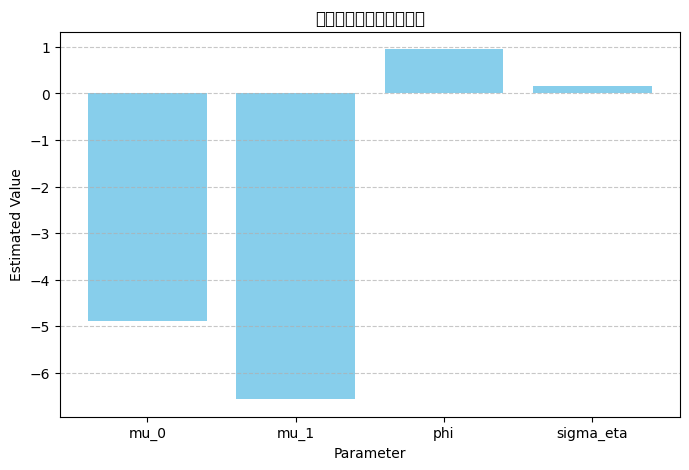

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

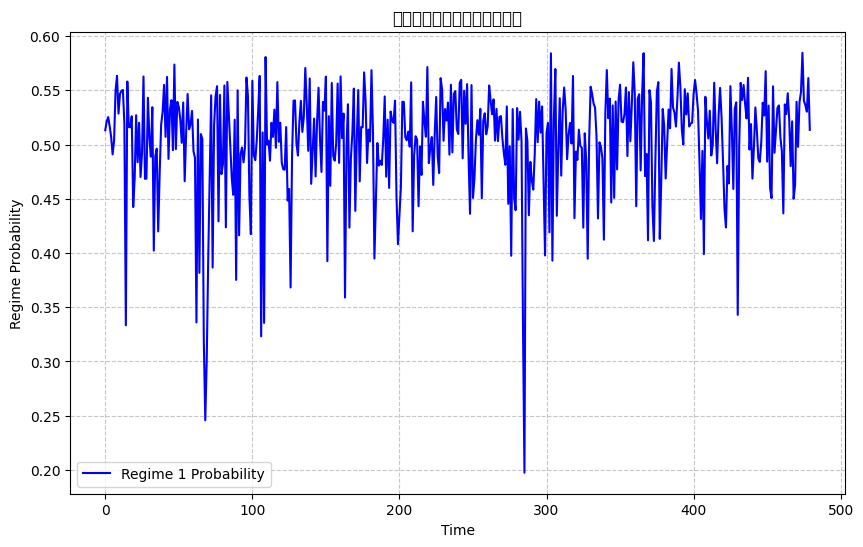

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 保存された結果を読み込み
results_file_path = '/content/drive/My Drive/研究/データ/your_results.csv'
results_df = pd.read_csv(results_file_path, encoding='shift_jis')

# パラメータの棒グラフ
plt.figure(figsize=(8, 5))
plt.bar(results_df["Parameter"], results_df["Value"], color="skyblue")
plt.title("推定パラメータの平均値")
plt.xlabel("Parameter")
plt.ylabel("Estimated Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 状態確率のプロット（logit_pからの推定）
# サンプルデータが必要です
logit_p_samples = samples["logit_p"]  # サンプルから取得
s_t_probs = np.exp(logit_p_samples) / (1 + np.exp(logit_p_samples))  # 確率に変換

# 平均確率を時系列でプロット
mean_probs = s_t_probs.mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(mean_probs, label="Regime 1 Probability", color="blue")
plt.title("時系列におけるレジーム確率")
plt.xlabel("Time")
plt.ylabel("Regime Probability")
plt.legend()
plt.grid(linestyle="--", alpha=0.7)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# サンプルデータ（mcmc.get_samples()の出力から想定されるデータ）
# 実際にはsamples辞書から適切なデータを取り出す必要があります。
mu_0_samples = samples['mu_0']
mu_1_samples = samples['mu_1']
regime_probs = s_t_samples  # 時系列データとしてのレジーム確率

# 可視化1: 各レジームのmuの分布
plt.figure(figsize=(10, 6))
sns.histplot(mu_0_samples, kde=True, bins=30, color="blue", label="mu_0 (Regime 0)", stat="density")
sns.histplot(mu_1_samples, kde=True, bins=30, color="red", label="mu_1 (Regime 1)", stat="density")
plt.title("Distributions of mu_0 and mu_1")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# 可視化2: レジーム確率の推移（時系列プロット）
plt.figure(figsize=(10, 6))
plt.plot(regime_probs, color="purple", label="Regime 1 Probability")
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')
plt.title("Time Series of Regime 1 Probabilities")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

# 可視化3: 各レジームのリターン分布
# レジーム0, レジーム1に分類されたリターンを仮定
regime_0_returns = log_returns[regime_probs < 0.5]
regime_1_returns = log_returns[regime_probs >= 0.5]

plt.figure(figsize=(10, 6))
sns.histplot(regime_0_returns, kde=True, bins=30, color="green", label="Regime 0 Returns", stat="density")
sns.histplot(regime_1_returns, kde=True, bins=30, color="orange", label="Regime 1 Returns", stat="density")
plt.title("Return Distributions by Regime")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


NameError: name 's_t_samples' is not defined